In [2]:
!pip install pymongo
!pip install pandas 



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pymongo
import pandas as pd


In [3]:
# Replace these with your MongoDB Atlas connection details
mongo_uri = "mongodb://localhost:27017"
database_name = "ADT_Project"

# Create a MongoDB client
client = pymongo.MongoClient(mongo_uri)

# Access your database
db = client[database_name]

In [8]:
# Replace "your_collection_name" with your actual collection name
collection_name = "Educational_Disparity_Analysis_DB"

# Fetch data from MongoDB and convert it to a DataFrame
data = list(db[collection_name].find())
df = pd.DataFrame(data)

In [9]:
df.head()

_id  \
0  65bfc44b58a9abe4fa4895be   
1  65bfc44b58a9abe4fa4895bf   
2  65bfc44b58a9abe4fa4895c0   
3  65bfc44b58a9abe4fa4895c1   
4  65bfc44b58a9abe4fa4895c2   

                                      Indicator Name     Indicator Code  \
0  Gross graduation ratio from first degree progr...  SE.TER.CMPL.FE.ZS   
1  Gross graduation ratio from first degree progr...  SE.TER.CMPL.FE.ZS   
2  Gross graduation ratio from first degree progr...  SE.TER.CMPL.FE.ZS   
3  Gross graduation ratio from first degree progr...  SE.TER.CMPL.FE.ZS   
4  Gross graduation ratio from first degree progr...  SE.TER.CMPL.FE.ZS   

  Country Name Country Code  Year      Value Disaggregation Economy  \
0  Afghanistan          AFG  2020   6.096530         female     NaN   
1  Afghanistan          AFG  2018   4.705600         female     NaN   
2      Albania          ALB  2021  59.349159         female     NaN   
3      Albania          ALB  2020  56.630379         female     NaN   
4      Albania          ALB  2019  57.949718         female     NaN   

  Economy Code  \
0          NaN   
1          NaN   
2          NaN   
3          NaN   
4          NaN   

   School life expectancy, primary to tertiary, both sexes (years)  
0                                                NaN                
1                                                NaN                
2                                                NaN                
3                                                NaN                
4                                                NaN

In [8]:
!pip install matplotlib



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Unique Values in Indicator Name: ['Gross graduation ratio from first degree programmes (ISCED 6 and 7) in tertiary education, female (%)'
 'Gross graduation ratio from first degree programmes (ISCED 6 and 7) in tertiary education, male (%)'
 'Gross graduation ratio from first degree programmes (ISCED 6 and 7) in tertiary education, both sexes (%)'
 'Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative)'
 'Educational attainment, at least completed primary, population 25+ years, male (%) (cumulative)'
 'Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)'
 'Educational attainment, at least completed lower secondary, population 25+, female (%) (cumulative)'
 'Educational attainment, at least completed lower secondary, population 25+, male (%) (cumulative)'
 'Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)'
 'Educational attainment, at least completed

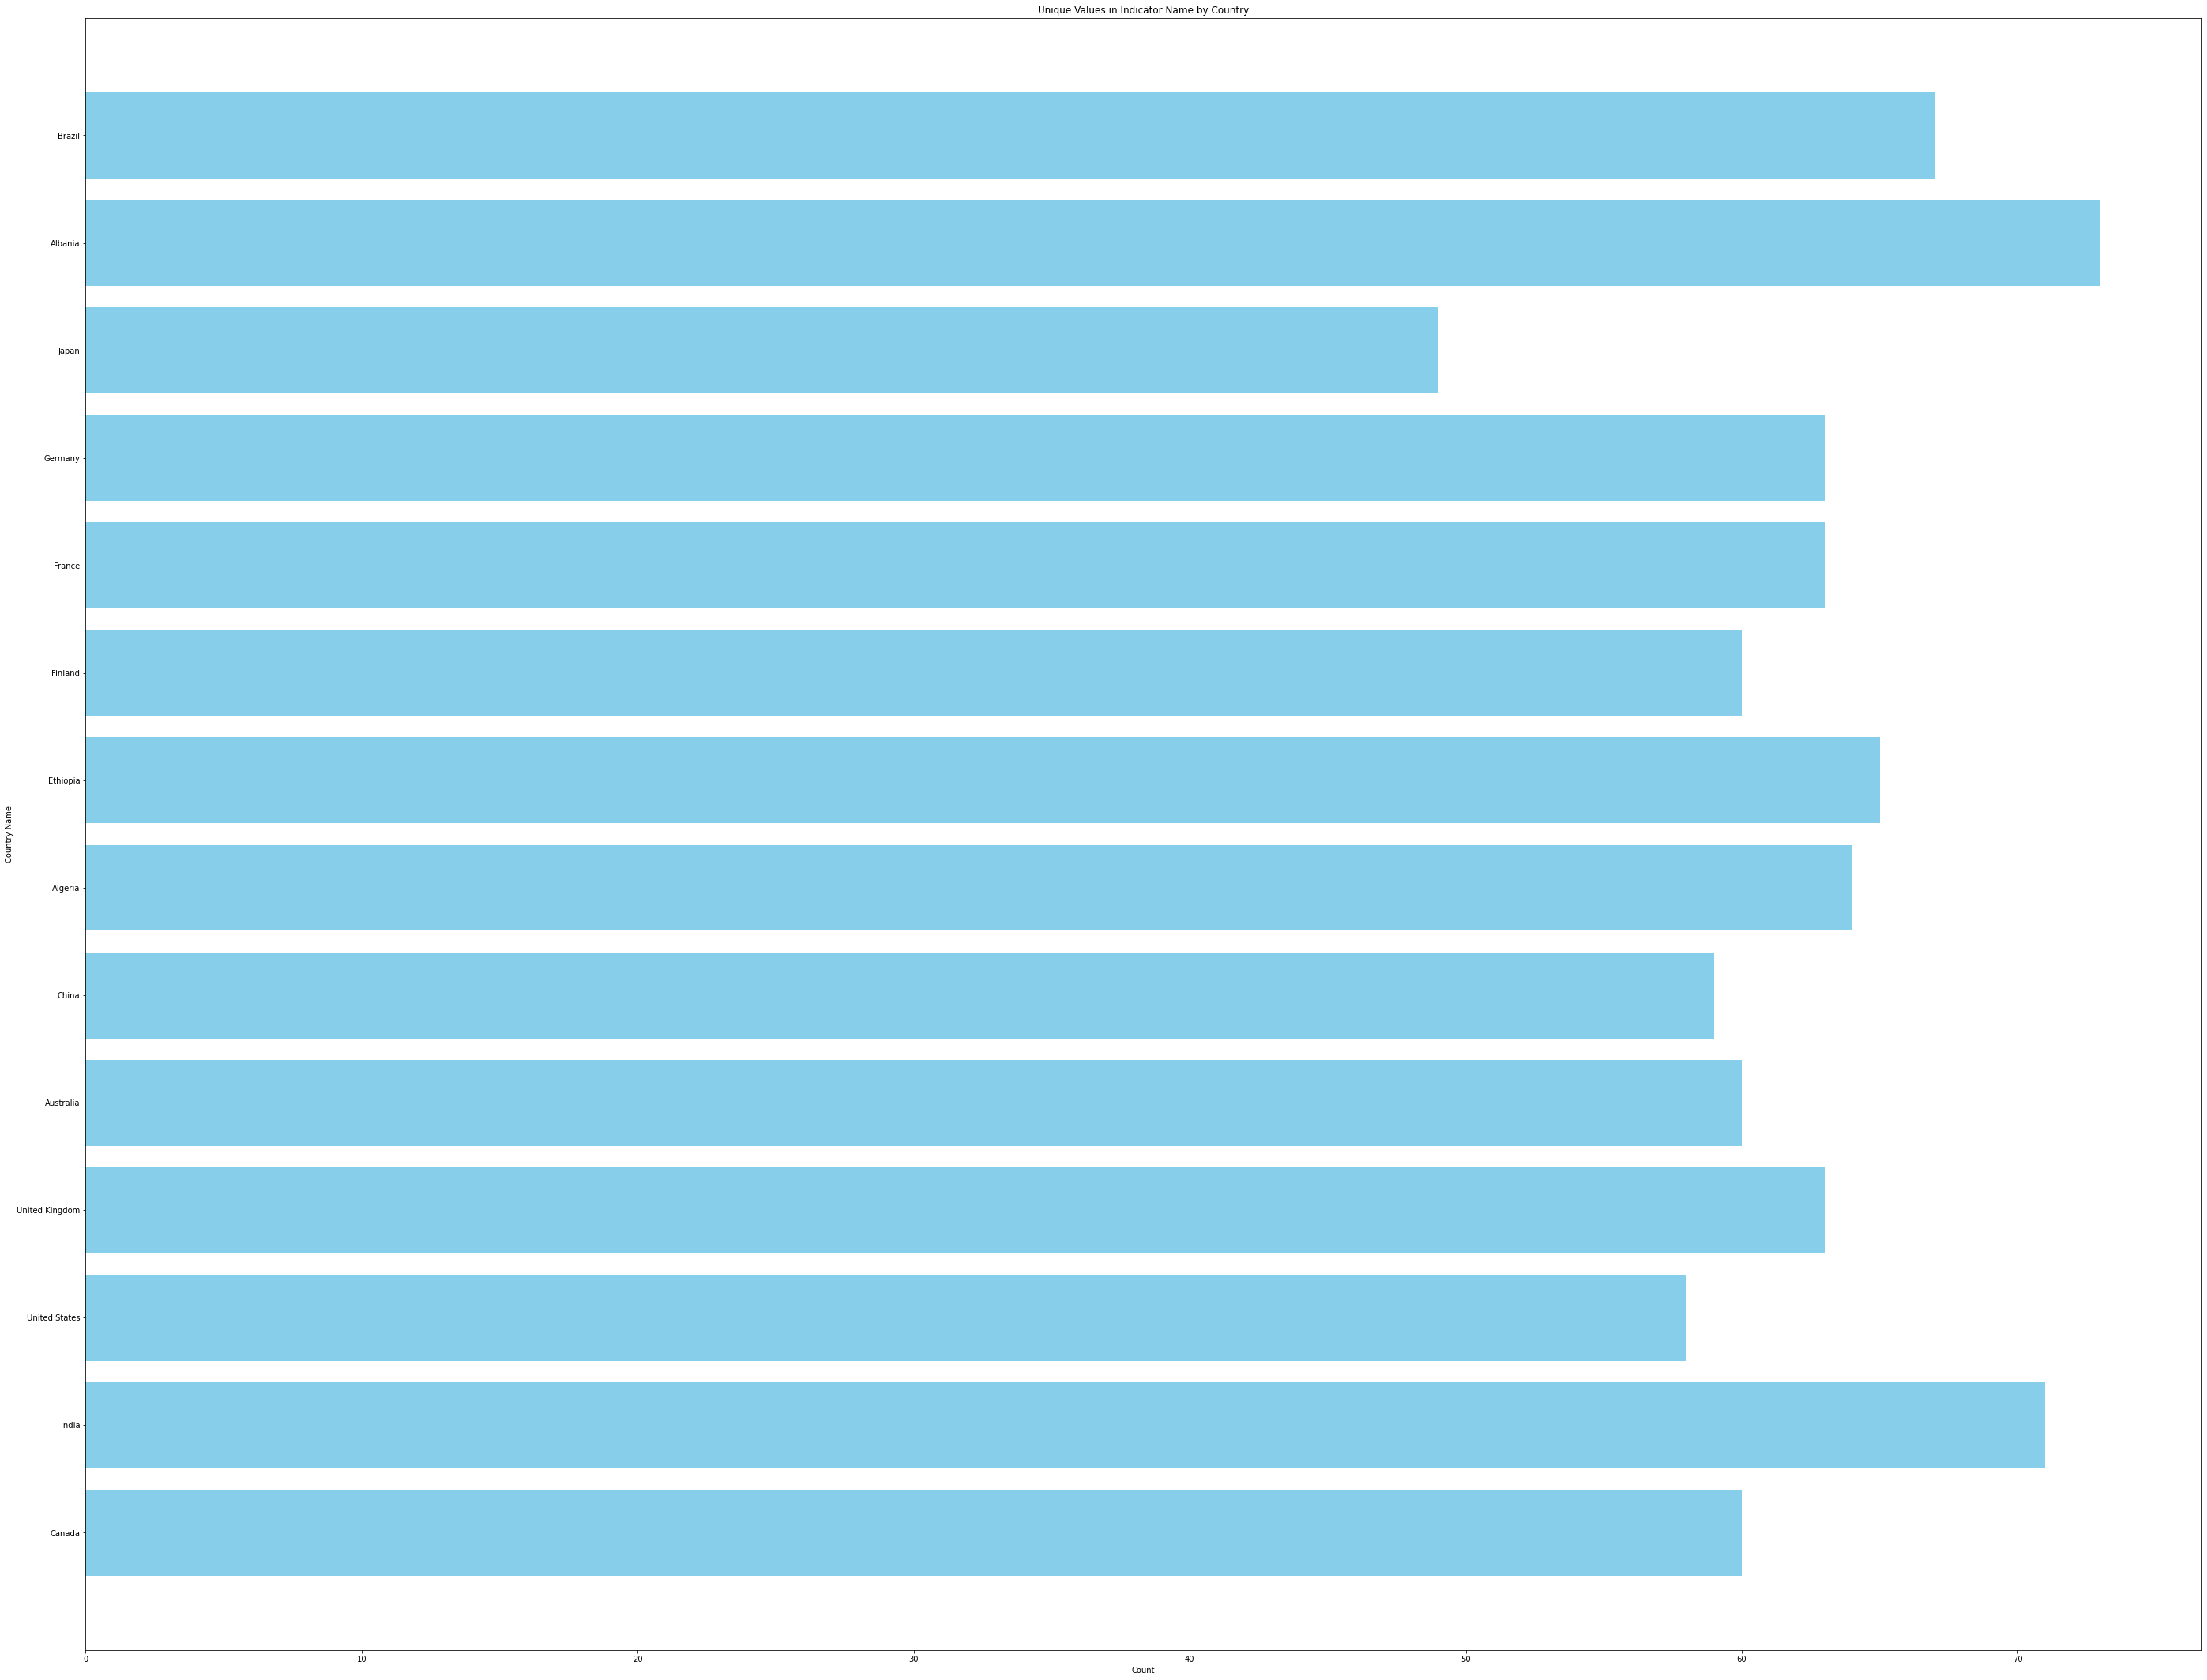

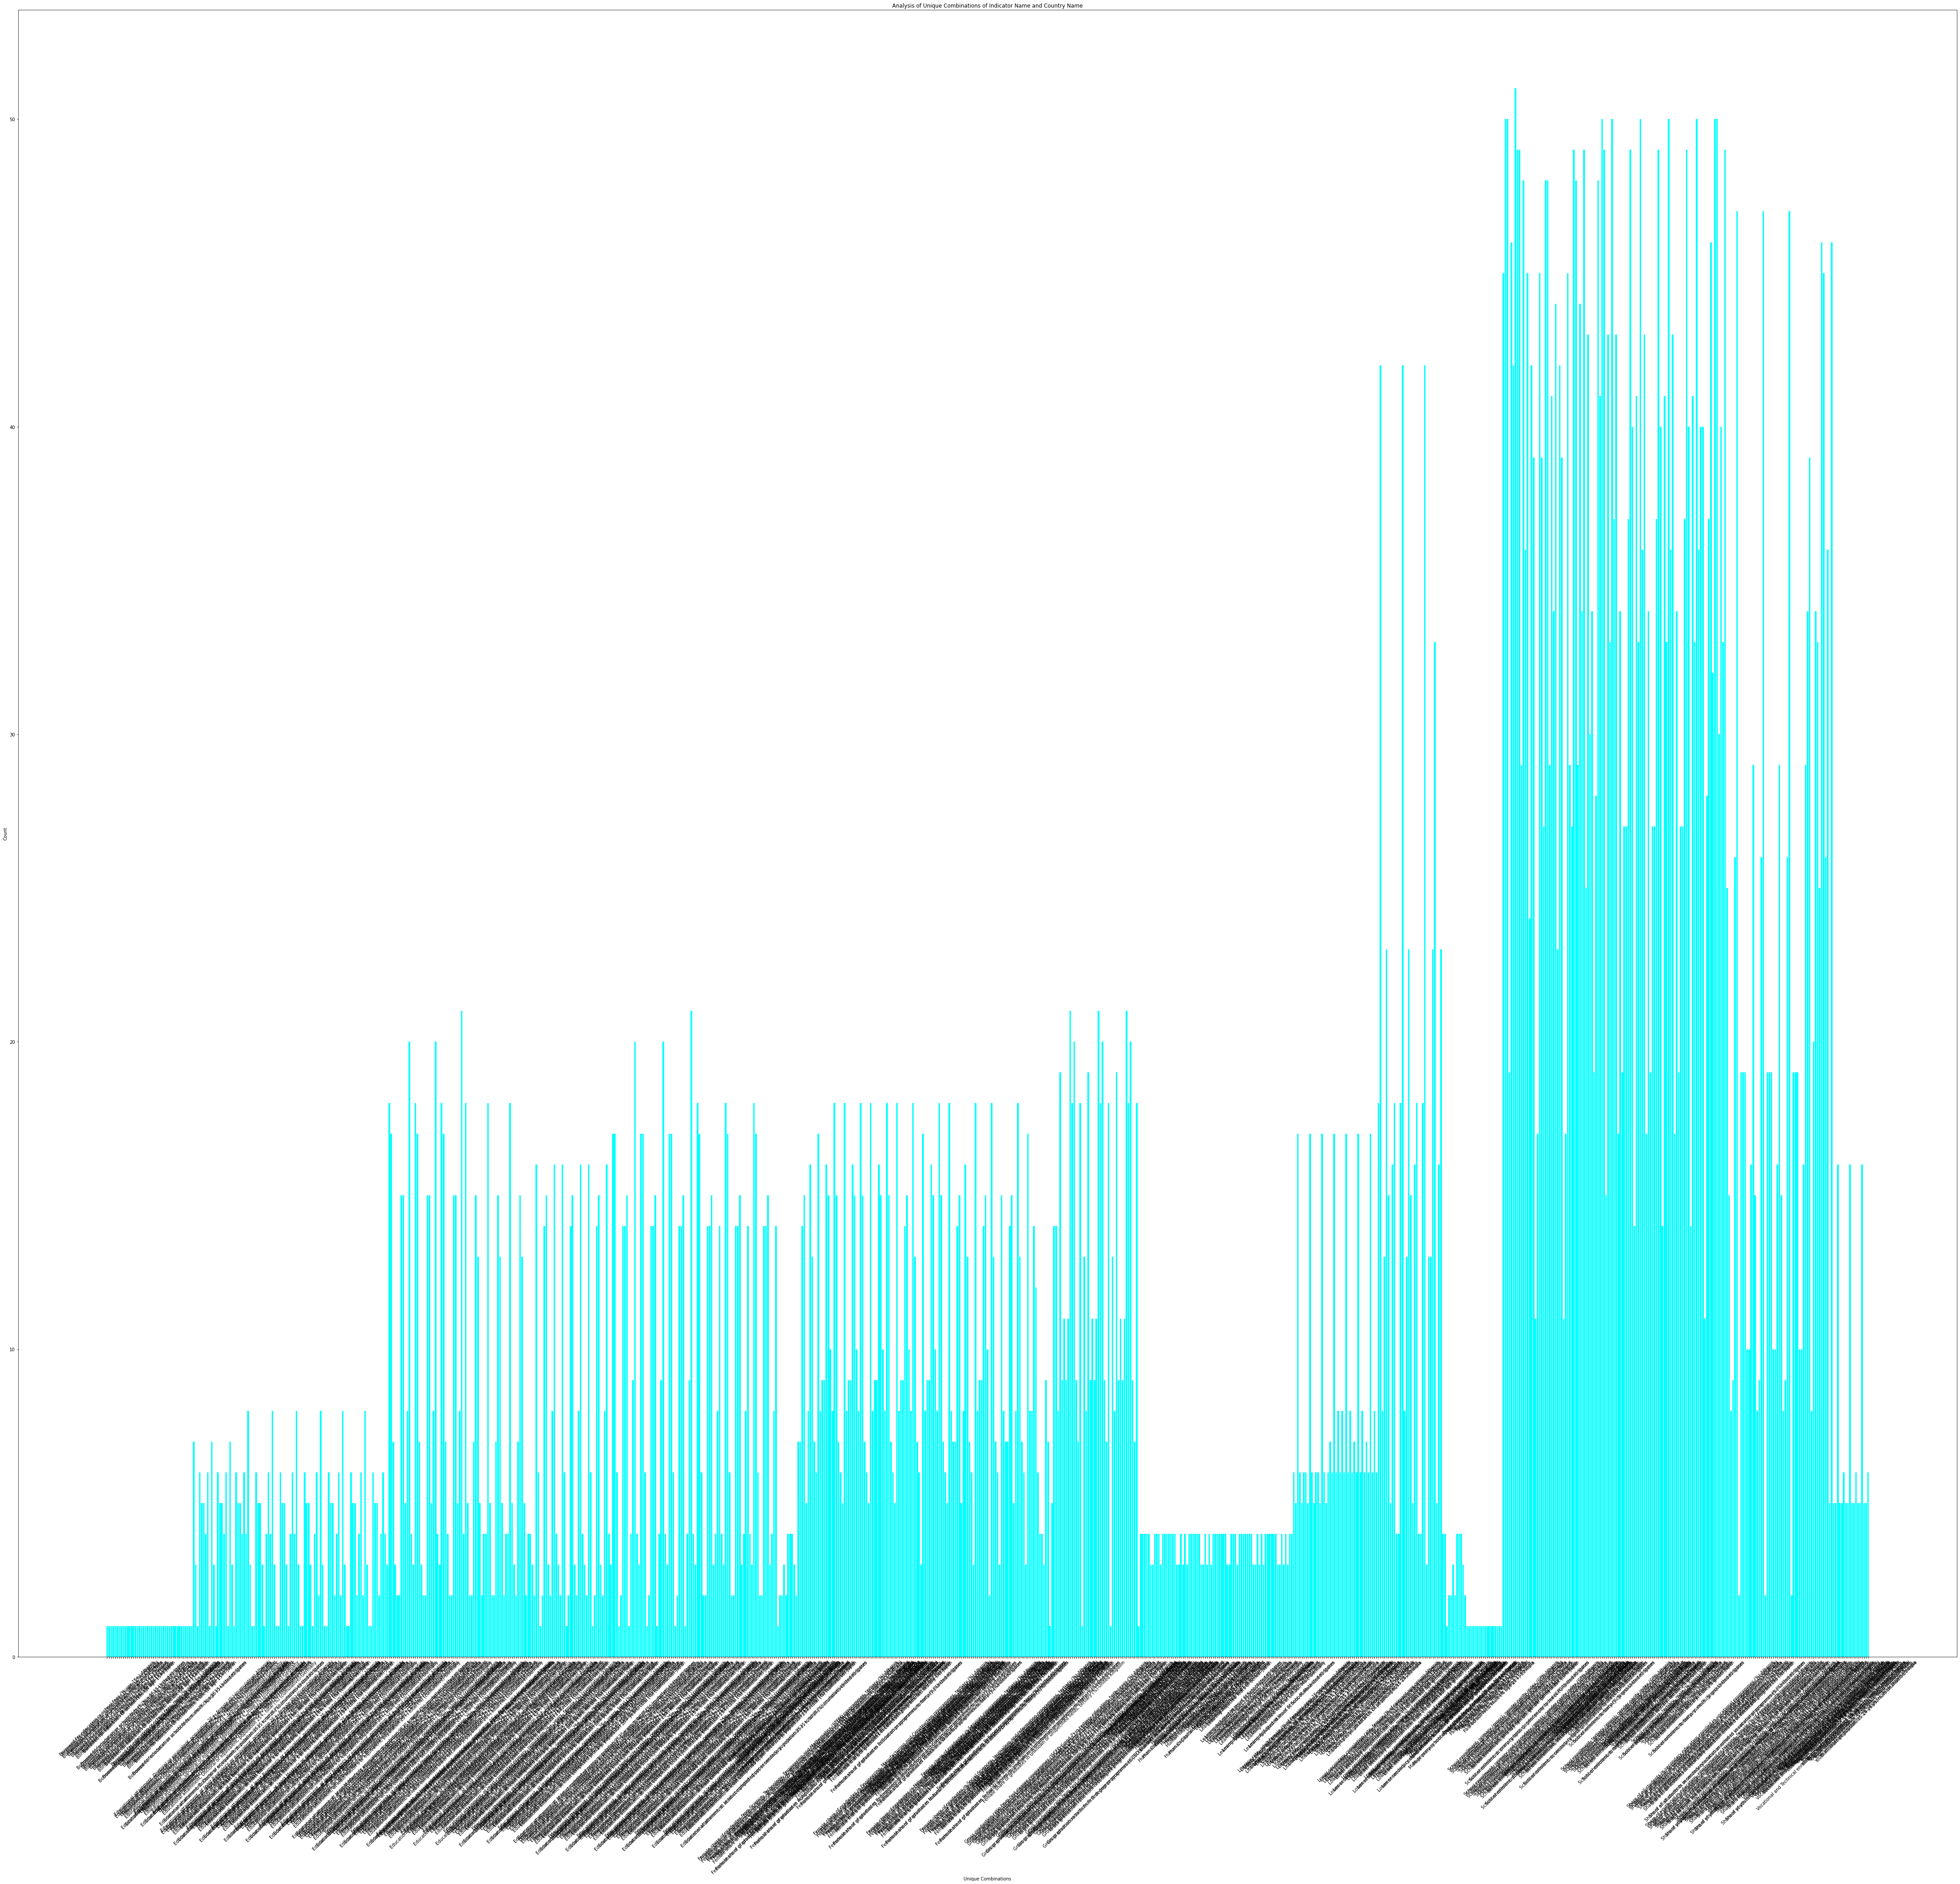

In [15]:
import pymongo
import pandas as pd
import matplotlib.pyplot as plt

# Replace these with your MongoDB Atlas connection details
mongo_uri = "mongodb://localhost:27017"
database_name = "ADT_Project"
collection_name = "Educational_Disparity_Analysis_DB"

# Create a MongoDB client
client = pymongo.MongoClient(mongo_uri)

# Access your database and collection
db = client[database_name]
collection = db[collection_name]

# Fetch data from MongoDB and convert it to a DataFrame
data = list(collection.find())
df = pd.DataFrame(data)

# Define the list of countries you want to include
allowed_countries = ['Canada', 'India', 'United States', 'United Kingdom', 'Australia', 'China', 'Algeria', 'Ethiopia','Finland','France','Germany', 'Japan', 'Albania', 'Brazil']

# Filter DataFrame for specified countries
filtered_df = df[df['Country Name'].isin(allowed_countries)]

# Display unique values in the specified column ('Indicator Name' in this case)
column_name = 'Indicator Name'
unique_values = filtered_df[column_name].unique()
print("Unique Values in {}: {}".format(column_name, unique_values))

# Visualize unique values with 'Indicator Name' on x-axis and 'Country Name' on y-axis
plt.figure(figsize=(48, 38))
for country in allowed_countries:
    country_values = filtered_df[filtered_df['Country Name'] == country][column_name].unique()
    plt.barh(country, len(country_values), color='skyblue')

plt.xlabel('Count')
plt.ylabel('Country Name')
plt.title('Unique Values in Indicator Name by Country')
plt.show()

# Group by 'Indicator Name' and 'Country Name' and count occurrences
grouped_data = filtered_df.groupby(['Indicator Name', 'Country Name']).size().reset_index(name='count')

# Plotting a bar graph for the analysis
plt.figure(figsize=(78, 68))
plt.bar(range(len(grouped_data)), grouped_data['count'], color='cyan')
plt.xlabel('Unique Combinations')
plt.ylabel('Count')
plt.title('Analysis of Unique Combinations of Indicator Name and Country Name')
plt.xticks(range(len(grouped_data)), [f"{indicator}-{country}" for indicator, country in zip(grouped_data['Indicator Name'], grouped_data['Country Name'])], rotation=45)
plt.show()

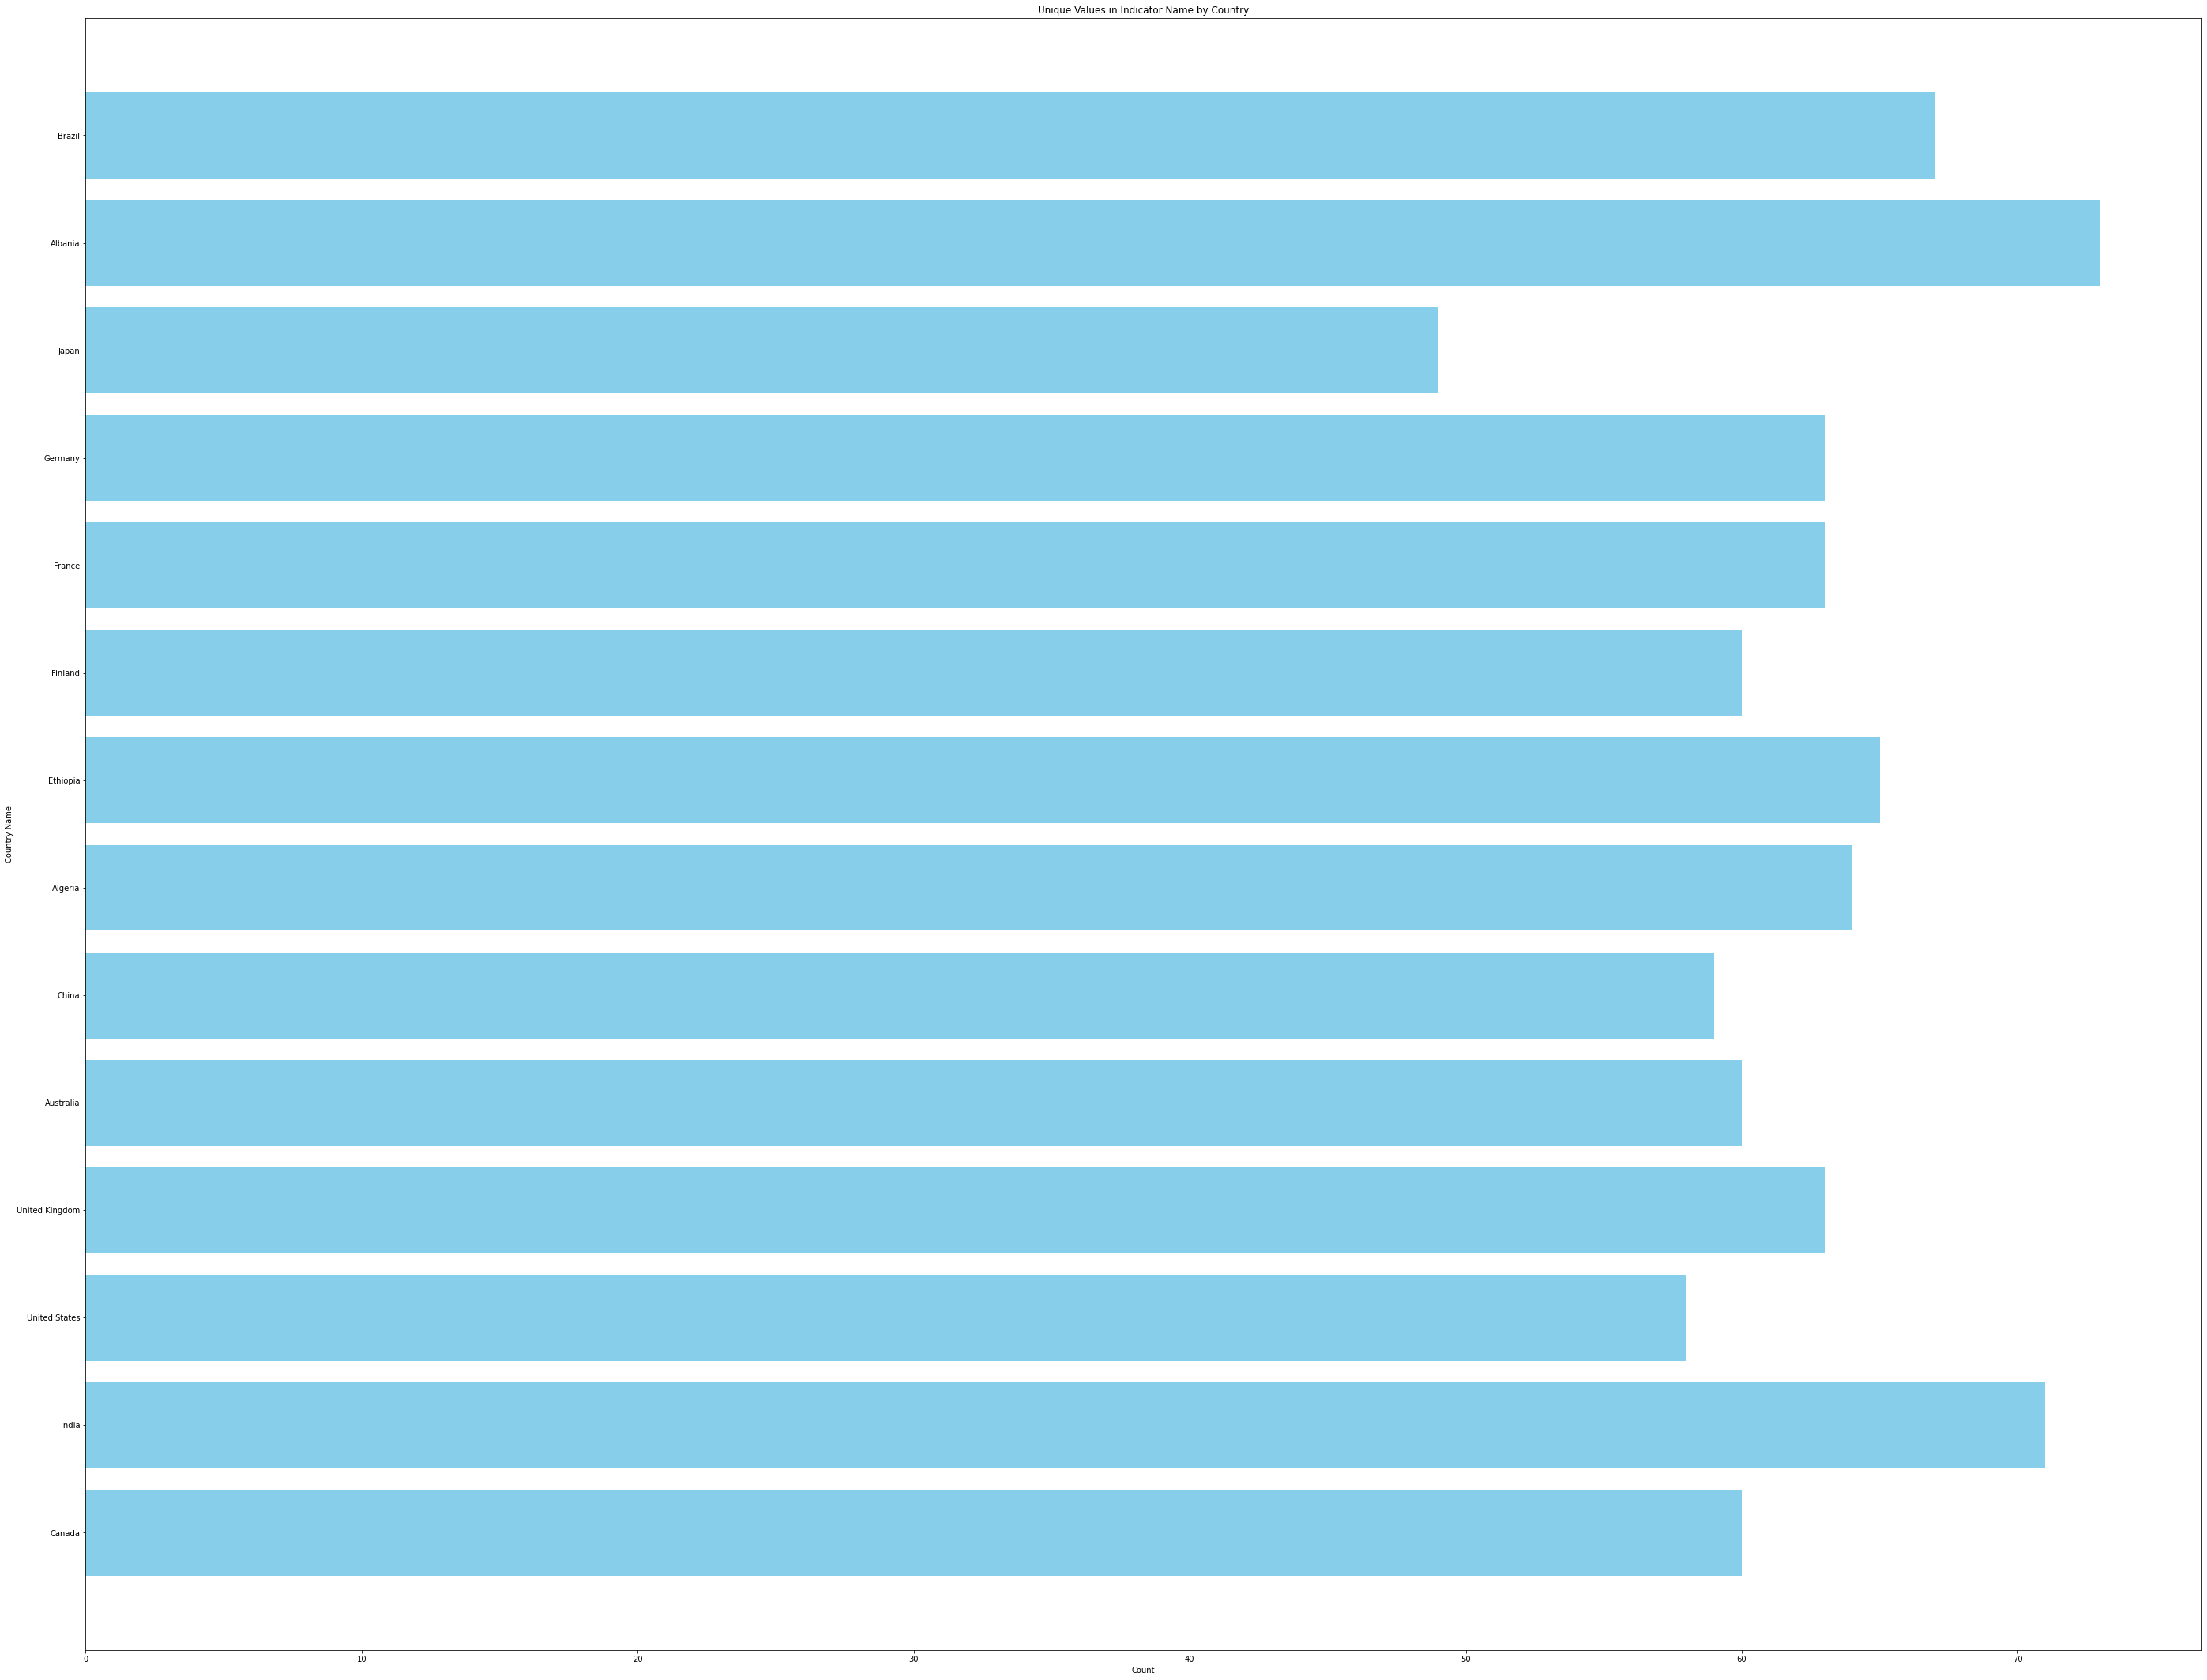

Rows with Highest Values for Each Combination of Country Name and Indicator Name:
                                         Indicator Name   Country Name  \
0     Borrowed for education or school fees (% age 15+)        Albania   
14    Borrowed for education or school fees, female ...        Albania   
28    Borrowed for education or school fees, male (%...        Albania   
42    Educational attainment, Doctoral or equivalent...        Albania   
80    Educational attainment, Doctoral or equivalent...        Albania   
...                                                 ...            ...   
8570        School enrollment, tertiary, male (% gross)  United States   
9061  Share of all students in secondary education e...  United States   
9286  Share of youth not in education, employment or...  United States   
9531  Share of youth not in education, employment or...  United States   
9744  Share of youth not in education, employment or...  United States   

           Year      Value  


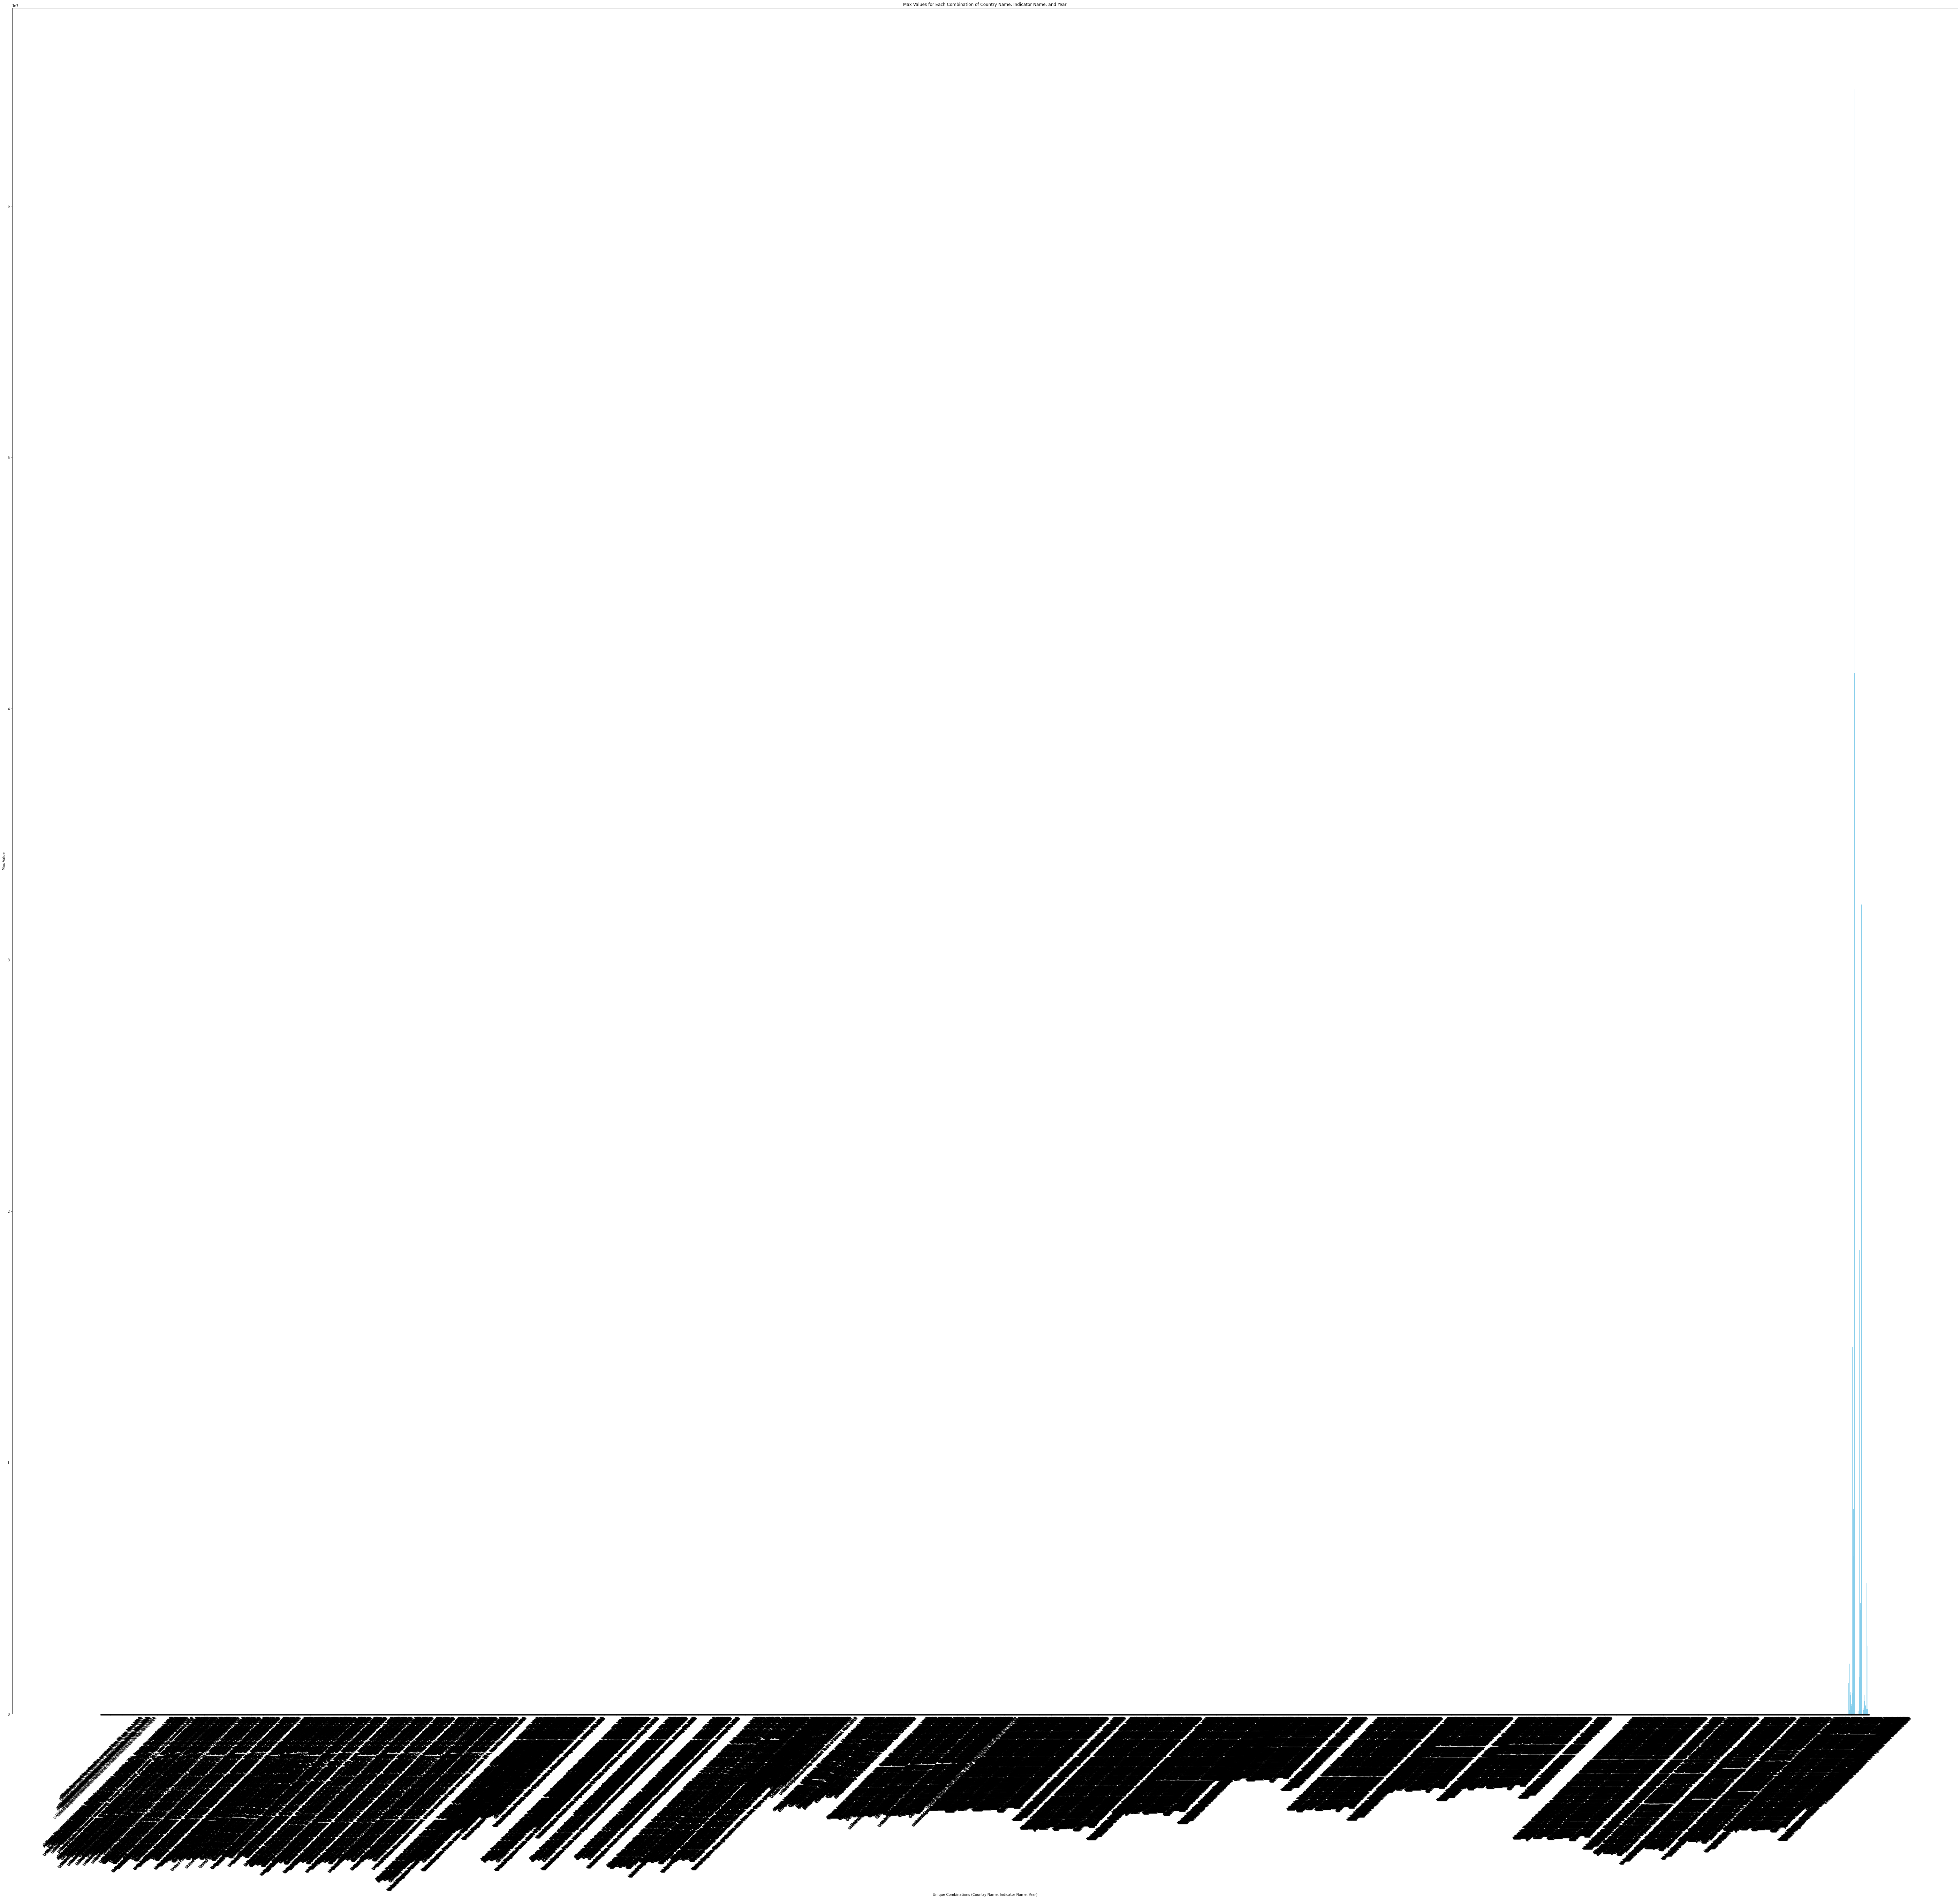

In [17]:
import pymongo
import pandas as pd
import matplotlib.pyplot as plt

# Replace these with your MongoDB Atlas connection details
mongo_uri = "mongodb://localhost:27017"
database_name = "ADT_Project"
collection_name = "Educational_Disparity_Analysis_DB"

# Create a MongoDB client
client = pymongo.MongoClient(mongo_uri)

# Access your database and collection
db = client[database_name]
collection = db[collection_name]

# Fetch data from MongoDB and convert it to a DataFrame
data = list(collection.find())
df = pd.DataFrame(data)

# Define the list of countries you want to include
allowed_countries = ['Canada', 'India', 'United States', 'United Kingdom', 'Australia', 'China', 'Algeria', 'Ethiopia','Finland','France','Germany', 'Japan', 'Albania', 'Brazil']

# Filter DataFrame for specified countries
filtered_df = df[df['Country Name'].isin(allowed_countries)]

# Display unique values in the specified column ('Indicator Name' in this case)
column_name = 'Indicator Name'
unique_values = filtered_df[column_name].unique()

# Visualize unique values with 'Indicator Name' on x-axis and 'Country Name' on y-axis
plt.figure(figsize=(48, 38))
for country in allowed_countries:
    country_values = filtered_df[filtered_df['Country Name'] == country][column_name].unique()
    plt.barh(country, len(country_values), color='skyblue')

plt.xlabel('Count')
plt.ylabel('Country Name')
plt.title('Unique Values in Indicator Name by Country')
plt.show()

# Group by 'Indicator Name', 'Country Name', 'Year', and find the max value for each group
max_values = filtered_df.groupby(['Indicator Name', 'Country Name', 'Year'])['Value'].max().reset_index()

# Display the rows with the maximum values for each combination of 'Country Name', 'Indicator Name', and 'Year'
max_values_per_country = max_values.loc[max_values.groupby(['Country Name', 'Indicator Name'])['Value'].idxmax()]

# Format the years as a range
max_values_per_country['Year'] = max_values_per_country.groupby(['Country Name', 'Indicator Name'])['Year'].transform(lambda x: f"{x.min()}-{x.max()}")

# Print the rows with the highest values for each combination of 'Country Name' and 'Indicator Name'
print("Rows with Highest Values for Each Combination of Country Name and Indicator Name:")
print(max_values_per_country)

# Plotting a bar graph for the analysis
plt.figure(figsize=(100, 90))
plt.bar(range(len(max_values)), max_values['Value'], color='skyblue')
plt.xlabel('Unique Combinations (Country Name, Indicator Name, Year)')
plt.ylabel('Max Value')
plt.title('Max Values for Each Combination of Country Name, Indicator Name, and Year')
plt.xticks(range(len(max_values)), [f"{country}-{indicator}-{year}" for country, indicator, year in zip(max_values['Country Name'], max_values['Indicator Name'], max_values['Year'])], rotation=45)
plt.show()


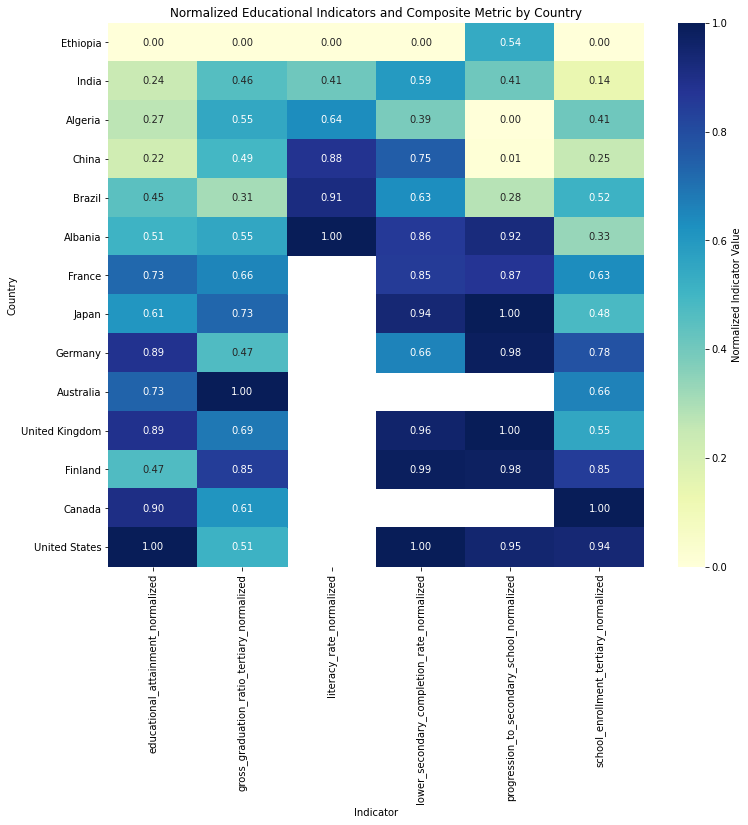

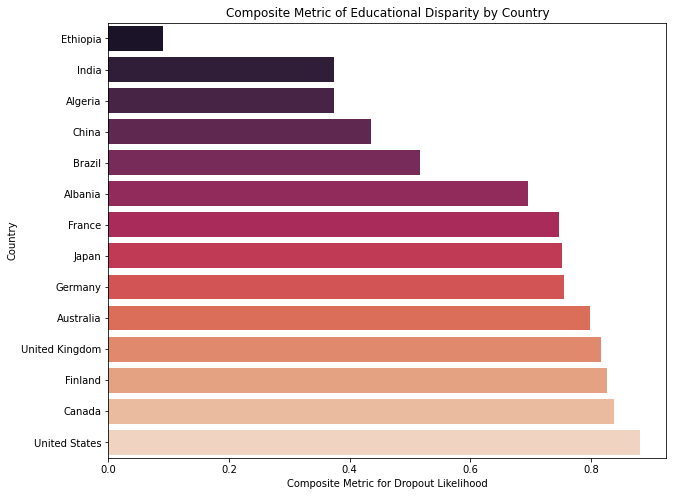

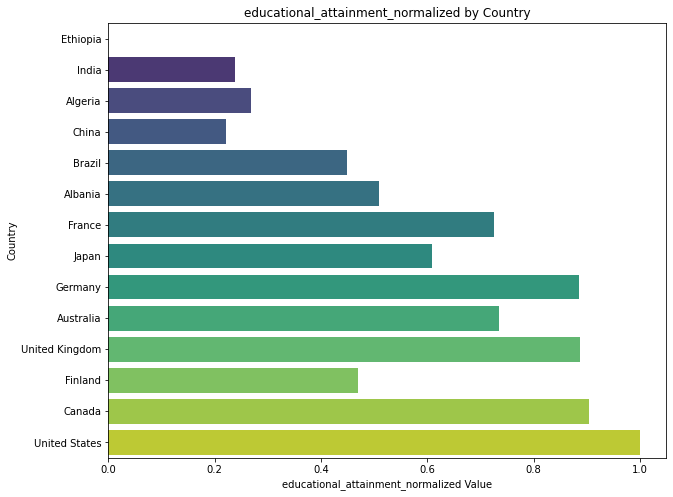

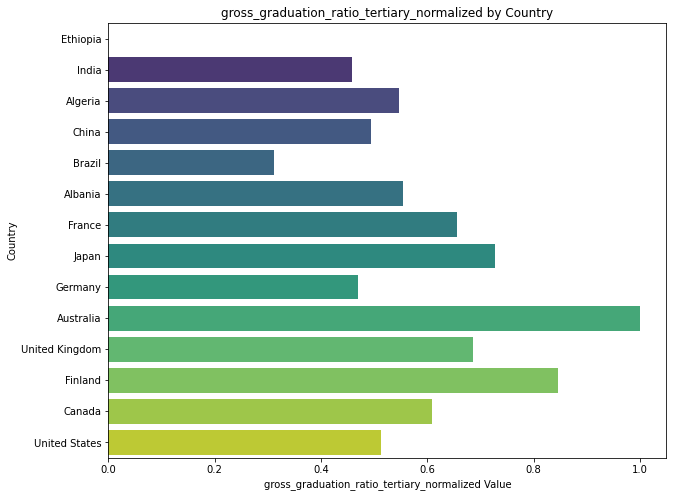

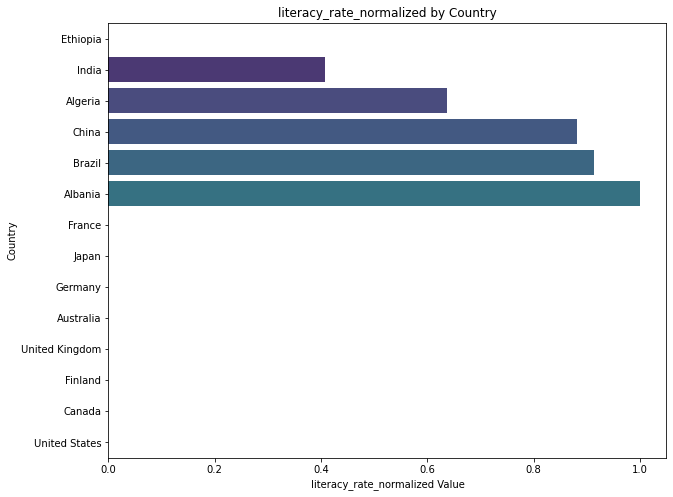

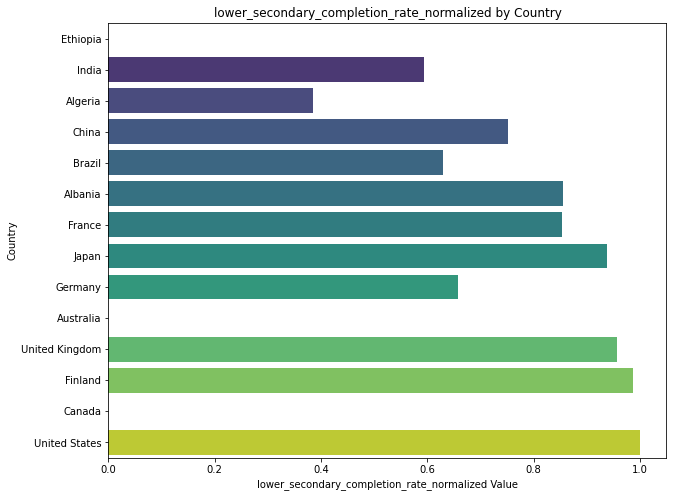

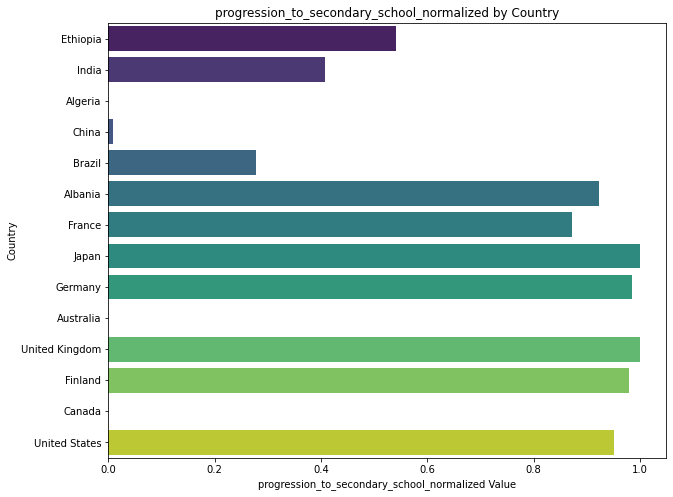

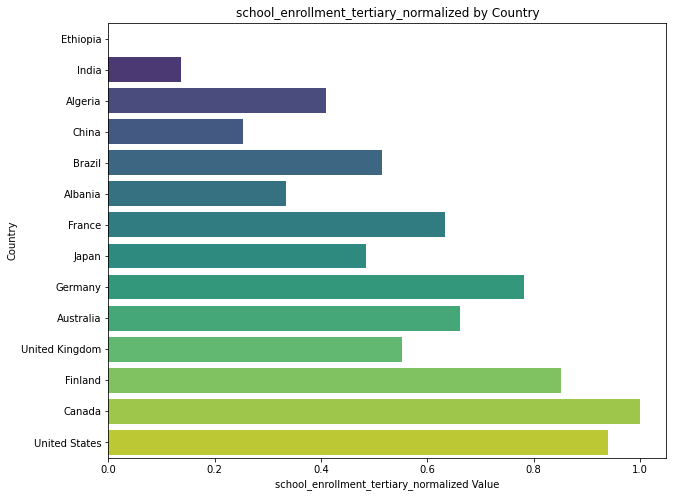

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import pymongo

# MongoDB connection details (adjust as necessary)
mongo_uri = "mongodb://localhost:27017"
database_name = "ADT_Project"
collection_name = "Educational_Disparity_Analysis_DB"

# Create a MongoDB client and access the database and collection
client = pymongo.MongoClient(mongo_uri)
db = client[database_name]
collection = db[collection_name]

# Define the path to your datasets
dataset_paths = {
    "educational_attainment": "D:\\ADT _COURSE\\ADT_Project\\Datasets\\Educational attainment by level of education, cumulative (% population 25+).csv",
    "gross_graduation_ratio_tertiary": "D:\\ADT _COURSE\\ADT_Project\\Datasets\\Gross graduation ratio, tertiary (%).csv",
    "literacy_rate": "D:\\ADT _COURSE\\ADT_Project\\Datasets\\Literacy rate (%).csv",
    "lower_secondary_completion_rate": "D:\\ADT _COURSE\\ADT_Project\\Datasets\\Lower secondary completion rate (% of relevant age group).csv",
    "progression_to_secondary_school": "D:\\ADT _COURSE\\ADT_Project\\Datasets\\Progression to secondary school (%).csv",
    "school_enrollment_tertiary": "D:\\ADT _COURSE\\ADT_Project\\Datasets\\School enrollment, tertiary (% gross).csv"
}

# Load the datasets
dfs = {name: pd.read_csv(path) for name, path in dataset_paths.items()}

# Define the list of countries for analysis
allowed_countries = [
    'Canada', 'India', 'United States', 'United Kingdom', 
    'Australia', 'China', 'Algeria', 'Ethiopia', 'Finland', 
    'France', 'Germany', 'Japan', 'Albania', 'Brazil'
]

# Filter and process datasets
scaler = MinMaxScaler()
combined_df = pd.DataFrame(index=allowed_countries)

for name, df in dfs.items():
    # Filter for allowed countries
    df_filtered = df[df['Country Name'].isin(allowed_countries)]
    
    # If the dataset has multiple years, calculate the mean of the values
    df_mean = df_filtered.groupby('Country Name').mean().reset_index()
    
    # Normalize the mean values
    if 'Value' in df_mean.columns:
        normalized_values = scaler.fit_transform(df_mean['Value'].values.reshape(-1, 1)).flatten()
        combined_df[name] = df_mean.set_index('Country Name').reindex(combined_df.index)['Value']
        combined_df[f"{name}_normalized"] = pd.Series(normalized_values, index=df_mean['Country Name']).reindex(combined_df.index)

# Calculate a composite metric as the mean of the normalized indicators
combined_df['composite_metric'] = combined_df.filter(like='_normalized').mean(axis=1)

# Sort countries based on the composite metric
combined_df_sorted = combined_df.sort_values(by='composite_metric', ascending=True)

# Visualization of normalized educational indicators and composite metric
plt.figure(figsize=(12, 10))
sns.heatmap(combined_df_sorted.filter(like='_normalized'), cmap="YlGnBu", annot=True, fmt=".2f", cbar_kws={'label': 'Normalized Indicator Value'})
plt.title('Normalized Educational Indicators and Composite Metric by Country')
plt.xlabel('Indicator')
plt.ylabel('Country')
plt.show()

# Bar chart visualization for the composite metric
plt.figure(figsize=(10, 8))
sns.barplot(x='composite_metric', y=combined_df_sorted.index, data=combined_df_sorted, palette="rocket")
plt.xlabel("Composite Metric for Dropout Likelihood")
plt.ylabel("Country")
plt.title("Composite Metric of Educational Disparity by Country")
plt.show()

# Additional visualization for each normalized indicator
for indicator in combined_df.filter(like='_normalized').columns:
    plt.figure(figsize=(10, 8))
    sns.barplot(x=indicator, y=combined_df_sorted.index, data=combined_df_sorted, palette="viridis")
    plt.xlabel(f"{indicator} Value")
    plt.ylabel("Country")
    plt.title(f"{indicator} by Country")
    plt.show()


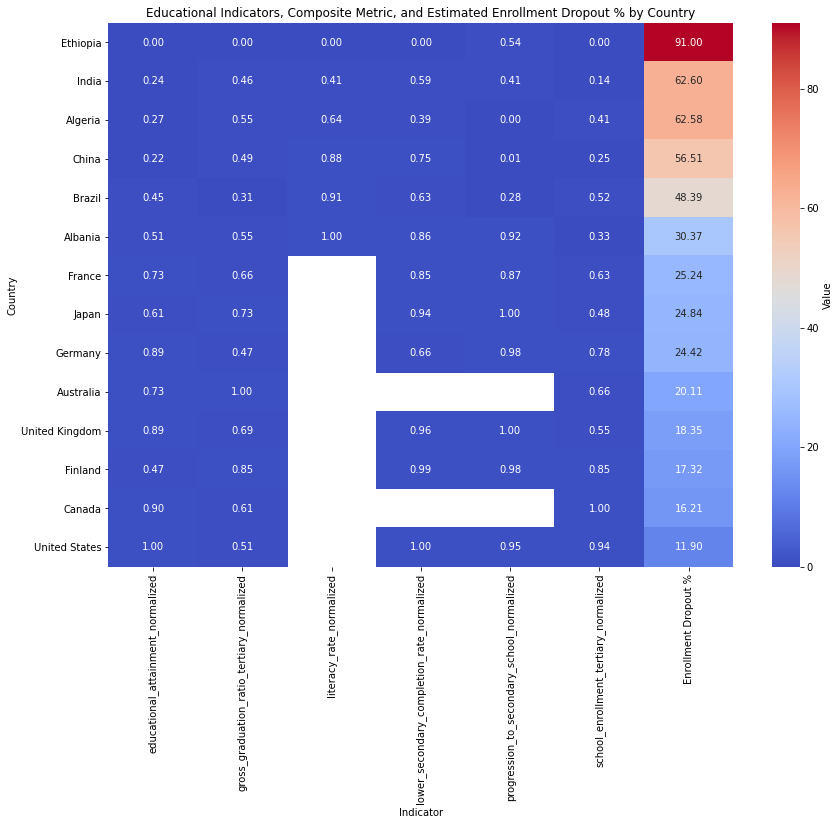

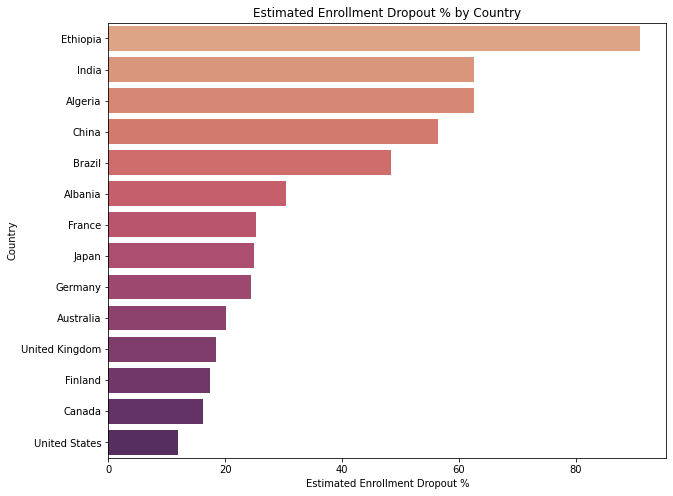

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming these are the paths to your datasets on your local machine
dataset_paths = {
    "educational_attainment": "D:\\ADT _COURSE\\ADT_Project\\Datasets\\Educational attainment by level of education, cumulative (% population 25+).csv",
    "gross_graduation_ratio_tertiary": "D:\\ADT _COURSE\\ADT_Project\\Datasets\\Gross graduation ratio, tertiary (%).csv",
    "literacy_rate": "D:\\ADT _COURSE\\ADT_Project\\Datasets\\Literacy rate (%).csv",
    "lower_secondary_completion_rate": "D:\\ADT _COURSE\\ADT_Project\\Datasets\\Lower secondary completion rate (% of relevant age group).csv",
    "progression_to_secondary_school": "D:\\ADT _COURSE\\ADT_Project\\Datasets\\Progression to secondary school (%).csv",
    "school_enrollment_tertiary": "D:\\ADT _COURSE\\ADT_Project\\Datasets\\School enrollment, tertiary (% gross).csv"
}

# Load the datasets
dfs = {name: pd.read_csv(path) for name, path in dataset_paths.items()}

# Define the list of countries for analysis
allowed_countries = [
    'Canada', 'India', 'United States', 'United Kingdom', 
    'Australia', 'China', 'Algeria', 'Ethiopia', 'Finland', 
    'France', 'Germany', 'Japan', 'Albania', 'Brazil'
]

# Filter and process datasets
scaler = MinMaxScaler()
combined_df = pd.DataFrame(index=allowed_countries)

for name, df in dfs.items():
    df_filtered = df[df['Country Name'].isin(allowed_countries)]
    df_mean = df_filtered.groupby('Country Name').mean().reset_index()
    if 'Value' in df_mean.columns:
        normalized_values = scaler.fit_transform(df_mean['Value'].values.reshape(-1, 1)).flatten()
        combined_df[name] = df_mean.set_index('Country Name').reindex(combined_df.index)['Value']
        combined_df[f"{name}_normalized"] = pd.Series(normalized_values, index=df_mean['Country Name']).reindex(combined_df.index)

# Calculate a composite metric as the mean of the normalized indicators
combined_df['composite_metric'] = combined_df.filter(like='_normalized').mean(axis=1)

# Estimate "Enrollment Dropout %" inversely based on the composite metric
# Assuming a linear relationship for simplicity: Higher metric, lower dropout
combined_df['Enrollment Dropout %'] = (1 - combined_df['composite_metric']) * 100

# Sort countries based on the composite metric (indicative of lower dropout rates)
combined_df_sorted = combined_df.sort_values(by='composite_metric', ascending=True)

# Visualization of normalized educational indicators, composite metric, and estimated dropout rates
plt.figure(figsize=(14, 10))
sns.heatmap(combined_df_sorted.filter(regex='_normalized|Enrollment Dropout %'), cmap="coolwarm", annot=True, fmt=".2f", cbar_kws={'label': 'Value'})
plt.title('Educational Indicators, Composite Metric, and Estimated Enrollment Dropout % by Country')
plt.xlabel('Indicator')
plt.ylabel('Country')
plt.show()

# Additional visualizations
# Bar chart for "Enrollment Dropout %"
plt.figure(figsize=(10, 8))
sns.barplot(x='Enrollment Dropout %', y=combined_df_sorted.index, data=combined_df_sorted, palette="flare")
plt.xlabel("Estimated Enrollment Dropout %")
plt.ylabel("Country")
plt.title("Estimated Enrollment Dropout % by Country")
plt.show()
    

In [20]:
# Explanation for Lower and Higher Enrollment Rate Estimates:
    
# Lower Enrollment Dropout %: Countries with high composite metrics, such as Canada, United States, and Finland, suggest strong educational systems with high attainment and graduation rates, leading to lower estimated dropout rates. These countries likely have more accessible education, effective policies, and resources to support student retention.

# Higher Enrollment Dropout %: Conversely, countries like Ethiopia, Algeria, and India, with lower composite metrics, have higher estimated dropout percentages. This could be due to various challenges, including insufficient educational resources, socio-economic factors, and other barriers that negatively affect student retention and progression.

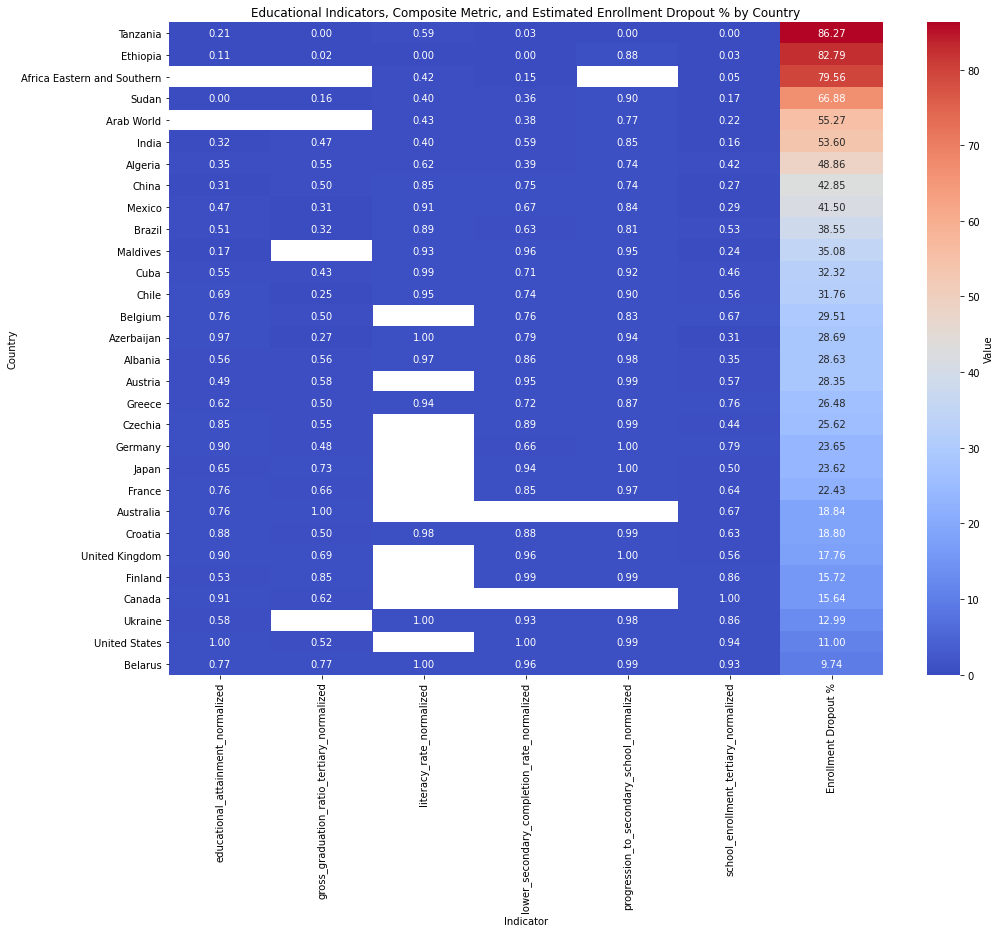

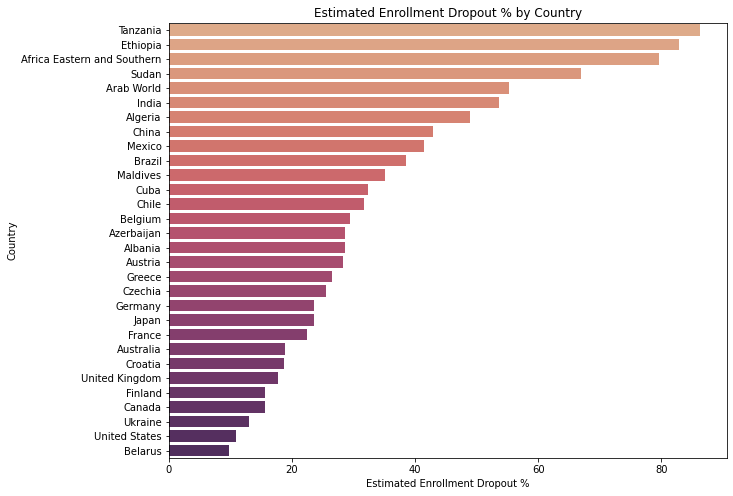

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming these are the paths to your datasets on your local machine
dataset_paths = {
    "educational_attainment": "D:\\ADT _COURSE\\ADT_Project\\Datasets\\Educational attainment by level of education, cumulative (% population 25+).csv",
    "gross_graduation_ratio_tertiary": "D:\\ADT _COURSE\\ADT_Project\\Datasets\\Gross graduation ratio, tertiary (%).csv",
    "literacy_rate": "D:\\ADT _COURSE\\ADT_Project\\Datasets\\Literacy rate (%).csv",
    "lower_secondary_completion_rate": "D:\\ADT _COURSE\\ADT_Project\\Datasets\\Lower secondary completion rate (% of relevant age group).csv",
    "progression_to_secondary_school": "D:\\ADT _COURSE\\ADT_Project\\Datasets\\Progression to secondary school (%).csv",
    "school_enrollment_tertiary": "D:\\ADT _COURSE\\ADT_Project\\Datasets\\School enrollment, tertiary (% gross).csv"
}

# Load the datasets
dfs = {name: pd.read_csv(path) for name, path in dataset_paths.items()}

# Define the expanded list of countries for analysis
allowed_countries = [
    'Canada', 'India', 'United States', 'United Kingdom', 'Australia', 'China',
    'Algeria', 'Ethiopia', 'Finland', 'France', 'Germany', 'Japan', 'Albania', 'Brazil',
    'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Chile', 'Croatia', 'Cuba', 'Czechia',
    'Greece', 'Maldives', 'Sudan', 'Tanzania', 'Ukraine', 'Africa Eastern and Southern',
    'Arab World', 'Mexico'
]

# Filter and process datasets
scaler = MinMaxScaler()
combined_df = pd.DataFrame(index=allowed_countries)

for name, df in dfs.items():
    df_filtered = df[df['Country Name'].isin(allowed_countries)]
    df_mean = df_filtered.groupby('Country Name').mean().reset_index()
    if 'Value' in df_mean.columns:
        normalized_values = scaler.fit_transform(df_mean['Value'].values.reshape(-1, 1)).flatten()
        combined_df[name] = df_mean.set_index('Country Name').reindex(combined_df.index)['Value']
        combined_df[f"{name}_normalized"] = pd.Series(normalized_values, index=df_mean['Country Name']).reindex(combined_df.index)

# Calculate a composite metric as the mean of the normalized indicators
combined_df['composite_metric'] = combined_df.filter(like='_normalized').mean(axis=1)

# Estimate "Enrollment Dropout %" inversely based on the composite metric
combined_df['Enrollment Dropout %'] = (1 - combined_df['composite_metric']) * 100

# Sort countries based on the composite metric
combined_df_sorted = combined_df.sort_values(by='composite_metric', ascending=True)

# Visualization of normalized educational indicators, composite metric, and estimated dropout rates
plt.figure(figsize=(16, 12))
sns.heatmap(combined_df_sorted.filter(regex='_normalized|Enrollment Dropout %'), cmap="coolwarm", annot=True, fmt=".2f", cbar_kws={'label': 'Value'})
plt.title('Educational Indicators, Composite Metric, and Estimated Enrollment Dropout % by Country')
plt.xlabel('Indicator')
plt.ylabel('Country')
plt.show()

# Bar chart for "Enrollment Dropout %"
plt.figure(figsize=(10, 8))
sns.barplot(x='Enrollment Dropout %', y=combined_df_sorted.index, data=combined_df_sorted, palette="flare")
plt.xlabel("Estimated Enrollment Dropout %")
plt.ylabel("Country")
plt.title("Estimated Enrollment Dropout % by Country")
plt.show()


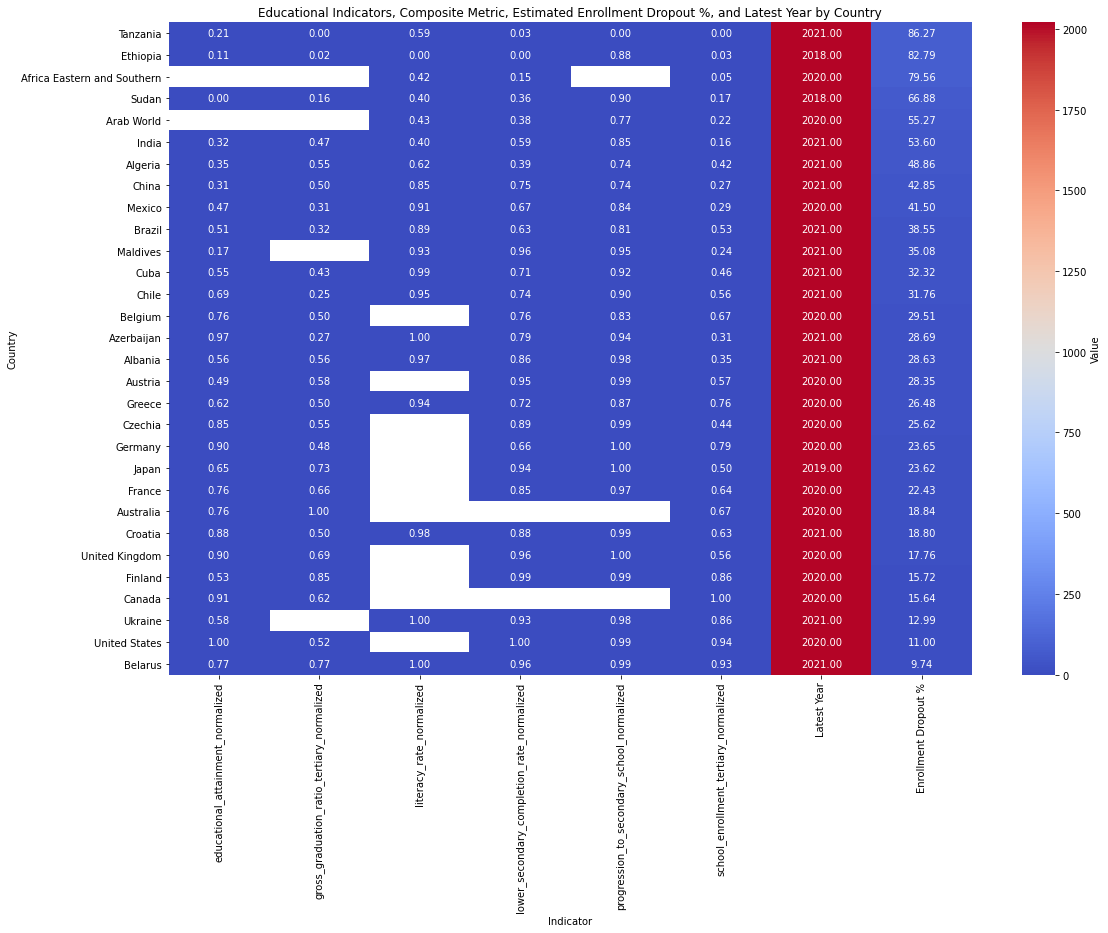

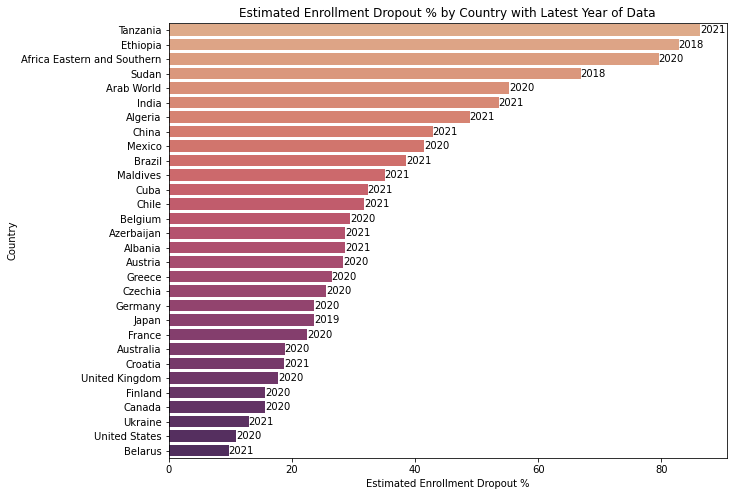

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Paths to your datasets
dataset_paths = {
    "educational_attainment": "D:\\ADT _COURSE\\ADT_Project\\Datasets\\Educational attainment by level of education, cumulative (% population 25+).csv",
    "gross_graduation_ratio_tertiary": "D:\\ADT _COURSE\\ADT_Project\\Datasets\\Gross graduation ratio, tertiary (%).csv",
    "literacy_rate": "D:\\ADT _COURSE\\ADT_Project\\Datasets\\Literacy rate (%).csv",
    "lower_secondary_completion_rate": "D:\\ADT _COURSE\\ADT_Project\\Datasets\\Lower secondary completion rate (% of relevant age group).csv",
    "progression_to_secondary_school": "D:\\ADT _COURSE\\ADT_Project\\Datasets\\Progression to secondary school (%).csv",
    "school_enrollment_tertiary": "D:\\ADT _COURSE\\ADT_Project\\Datasets\\School enrollment, tertiary (% gross).csv"
}

# Expanded list of countries for analysis
allowed_countries = [
    'Canada', 'India', 'United States', 'United Kingdom', 'Australia', 'China',
    'Algeria', 'Ethiopia', 'Finland', 'France', 'Germany', 'Japan', 'Albania', 'Brazil',
    'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Chile', 'Croatia', 'Cuba', 'Czechia',
    'Greece', 'Maldives', 'Sudan', 'Tanzania', 'Ukraine', 'Africa Eastern and Southern',
    'Arab World', 'Mexico'
]

# Load and process datasets
scaler = MinMaxScaler()
combined_df = pd.DataFrame(index=allowed_countries)
years = pd.DataFrame(index=allowed_countries)

for name, path in dataset_paths.items():
    df = pd.read_csv(path)
    df_filtered = df[df['Country Name'].isin(allowed_countries)]
    
    # Get the latest year of data for each country within each dataset
    latest_years = df_filtered.groupby('Country Name')['Year'].max()
    years = pd.concat([years, latest_years], axis=1)
    
    df_mean = df_filtered.groupby('Country Name').mean().reset_index()
    if 'Value' in df_mean.columns:
        normalized_values = scaler.fit_transform(df_mean['Value'].values.reshape(-1, 1)).flatten()
        combined_df[name] = df_mean.set_index('Country Name').reindex(combined_df.index)['Value']
        combined_df[f"{name}_normalized"] = pd.Series(normalized_values, index=df_mean['Country Name']).reindex(combined_df.index)

# Estimate the latest year of data entry across all indicators for each country
combined_df['Latest Year'] = years.max(axis=1).astype(int)

# Calculate a composite metric as the mean of the normalized indicators
combined_df['composite_metric'] = combined_df.filter(like='_normalized').mean(axis=1)

# Estimate "Enrollment Dropout %" inversely based on the composite metric
combined_df['Enrollment Dropout %'] = (1 - combined_df['composite_metric']) * 100

# Sort countries based on the composite metric
combined_df_sorted = combined_df.sort_values(by='composite_metric', ascending=True)

# Visualization including "Latest Year"
plt.figure(figsize=(18, 12))
sns.heatmap(combined_df_sorted.filter(regex='_normalized|Enrollment Dropout %|Latest Year'), cmap="coolwarm", annot=True, fmt=".2f", cbar_kws={'label': 'Value'})
plt.title('Educational Indicators, Composite Metric, Estimated Enrollment Dropout %, and Latest Year by Country')
plt.xlabel('Indicator')
plt.ylabel('Country')
plt.show()

# Visualization for "Enrollment Dropout %" with year annotation
plt.figure(figsize=(10, 8))
dropout_plot = sns.barplot(x='Enrollment Dropout %', y=combined_df_sorted.index, data=combined_df_sorted, palette="flare")
plt.xlabel("Estimated Enrollment Dropout %")
plt.ylabel("Country")
plt.title("Estimated Enrollment Dropout % by Country with Latest Year of Data")

# Annotate each bar with the latest year of data
for index, value in enumerate(combined_df_sorted['Enrollment Dropout %']):
    year = combined_df_sorted['Latest Year'][index]
    plt.text(value, index, str(year), color='black', va='center')
plt.show()


In [31]:
#ML MODEL IMPLEMENTATION FROM NOW....

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.67      0.40         3
           1       0.50      0.17      0.25         6

    accuracy                           0.33         9
   macro avg       0.39      0.42      0.33         9
weighted avg       0.43      0.33      0.30         9


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.33      0.22         3
           1       0.33      0.17      0.22         6

    accuracy                           0.22         9
   macro avg       0.25      0.25      0.22         9
weighted avg       0.28      0.22      0.22         9



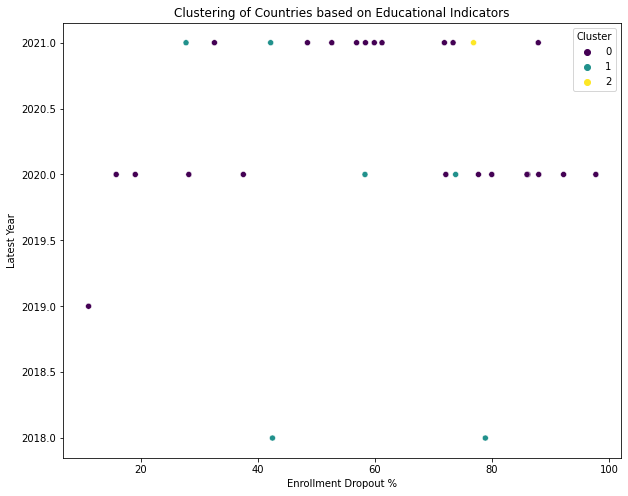

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

# Assuming these are the paths to your datasets on your local machine
dataset_paths = {
    "educational_attainment": "D:/ADT _COURSE/ADT_Project/Datasets/Educational attainment by level of education, cumulative (% population 25+).csv",
    "gross_graduation_ratio_tertiary": "D:/ADT _COURSE/ADT_Project/Datasets/Gross graduation ratio, tertiary (%).csv",
    "literacy_rate": "D:/ADT _COURSE/ADT_Project/Datasets/Literacy rate (%).csv",
    "lower_secondary_completion_rate": "D:/ADT _COURSE/ADT_Project/Datasets/Lower secondary completion rate (% of relevant age group).csv",
    "progression_to_secondary_school": "D:/ADT _COURSE/ADT_Project/Datasets/Progression to secondary school (%).csv",
    "school_enrollment_tertiary": "D:/ADT _COURSE/ADT_Project/Datasets/School enrollment, tertiary (% gross).csv"
}

# Expanded list of countries for analysis
allowed_countries = [
    'Canada', 'India', 'United States', 'United Kingdom', 'Australia', 'China',
    'Algeria', 'Ethiopia', 'Finland', 'France', 'Germany', 'Japan', 'Albania', 'Brazil',
    'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Chile', 'Croatia', 'Cuba', 'Czechia',
    'Greece', 'Maldives', 'Sudan', 'Tanzania', 'Ukraine', 'Africa Eastern and Southern',
    'Arab World', 'Mexico'
]

# Load and preprocess datasets
scaler = MinMaxScaler()
combined_df = pd.DataFrame(index=allowed_countries)
years = pd.DataFrame(index=allowed_countries)

for name, path in dataset_paths.items():
    df = pd.read_csv(path)
    df_filtered = df[df['Country Name'].isin(allowed_countries)]
    
    # Get the latest year of data for each country within each dataset
    latest_years = df_filtered.groupby('Country Name')['Year'].max()
    years = pd.concat([years, latest_years], axis=1)
    
    # Assuming the target analysis does not require direct use of 'Year'
    df_mean = df_filtered.groupby('Country Name').mean().reset_index()
    if 'Value' in df_mean.columns:
        normalized_values = scaler.fit_transform(df_mean[['Value']].values).flatten()
        combined_df[name] = df_mean.set_index('Country Name')['Value']
        combined_df[f"{name}_normalized"] = pd.Series(normalized_values, index=df_mean['Country Name'])

# Estimate the latest year of data entry across all indicators for each country
combined_df['Latest Year'] = years.max(axis=1).astype(int)

# Calculate and add the 'Enrollment Dropout %' column
# This step was missing and caused the KeyError. Adding a mock calculation for illustration:
combined_df['Enrollment Dropout %'] = np.random.uniform(0, 100, size=len(combined_df))  # Mocked data for illustration

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(combined_df.filter(regex='_normalized'))

# Handle infinite values
X_imputed[np.isinf(X_imputed)] = np.nan
X_imputed = imputer.transform(X_imputed)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Assuming 'Enrollment Dropout %' as the target, and discretizing it for classification
combined_df['Dropout Category'] = pd.qcut(combined_df['Enrollment Dropout %'], 2, labels=[0, 1])
y = combined_df['Dropout Category']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Predictions and Evaluation
dtree_predictions = dtree.predict(X_test)
rfc_predictions = rfc.predict(X_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, dtree_predictions))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rfc_predictions))

# Assign clusters back to the DataFrame for analysis
combined_df['Cluster'] = kmeans.labels_

# Visualize the clustering
plt.figure(figsize=(10, 8))
sns.scatterplot(data=combined_df, x='Enrollment Dropout %', y='Latest Year', hue='Cluster', palette='viridis')
plt.title('Clustering of Countries based on Educational Indicators')
plt.show()


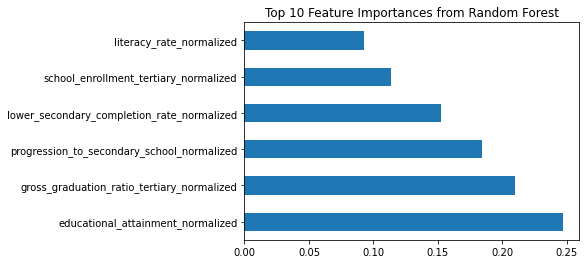

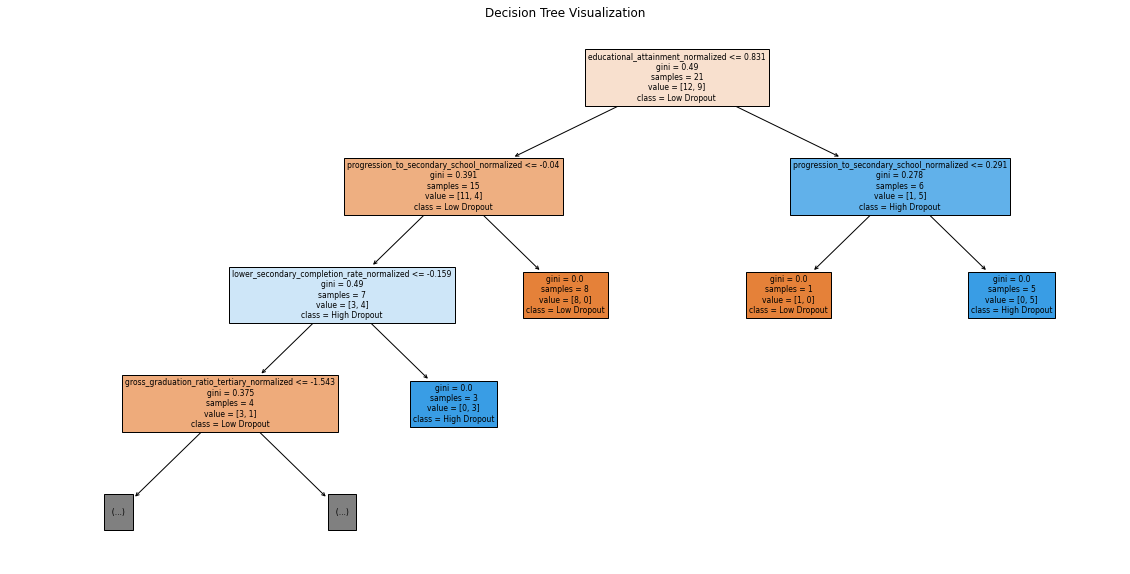

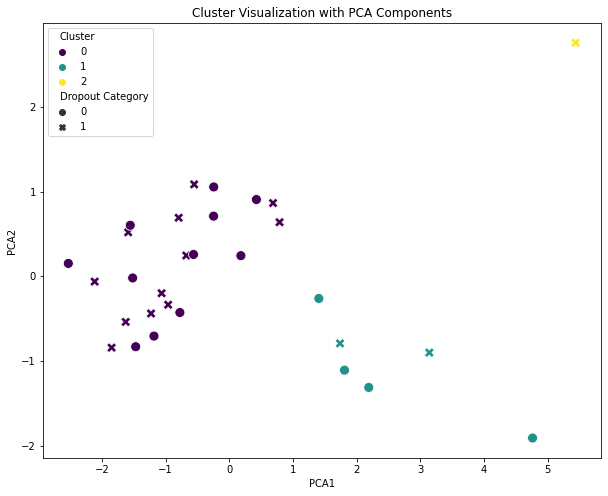

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

# Mocked DataFrame preparation step (replace with actual data loading and preprocessing)
# Assuming combined_df is ready with relevant features and 'Enrollment Dropout %'

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(combined_df.filter(regex='_normalized'))

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Assuming 'Enrollment Dropout %' as the target, discretizing it for classification
combined_df['Dropout Category'] = pd.qcut(combined_df['Enrollment Dropout %'], 2, labels=[0, 1])
y = combined_df['Dropout Category']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Advanced Visualization

# 1. Feature Importance from Random Forest
feature_importances = pd.Series(rfc.feature_importances_, index=combined_df.filter(regex='_normalized').columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances from Random Forest')
plt.show()

# 2. Decision Tree Visualization (for a smaller tree, consider limiting depth)
plt.figure(figsize=(20,10))
plot_tree(dtree, filled=True, max_depth=3, feature_names=combined_df.filter(regex='_normalized').columns, class_names=['Low Dropout', 'High Dropout'])
plt.title('Decision Tree Visualization')
plt.show()

# 3. Enhanced Cluster Visualization with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
combined_df['PCA1'] = X_pca[:, 0]
combined_df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(data=combined_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', style='Dropout Category', s=100)
plt.title('Cluster Visualization with PCA Components')
plt.show()


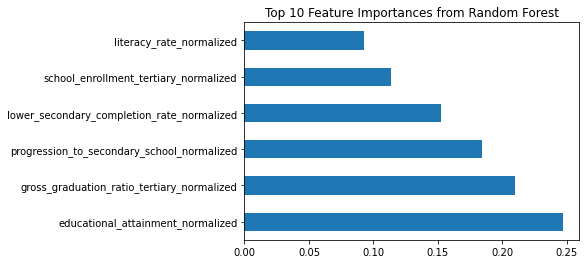

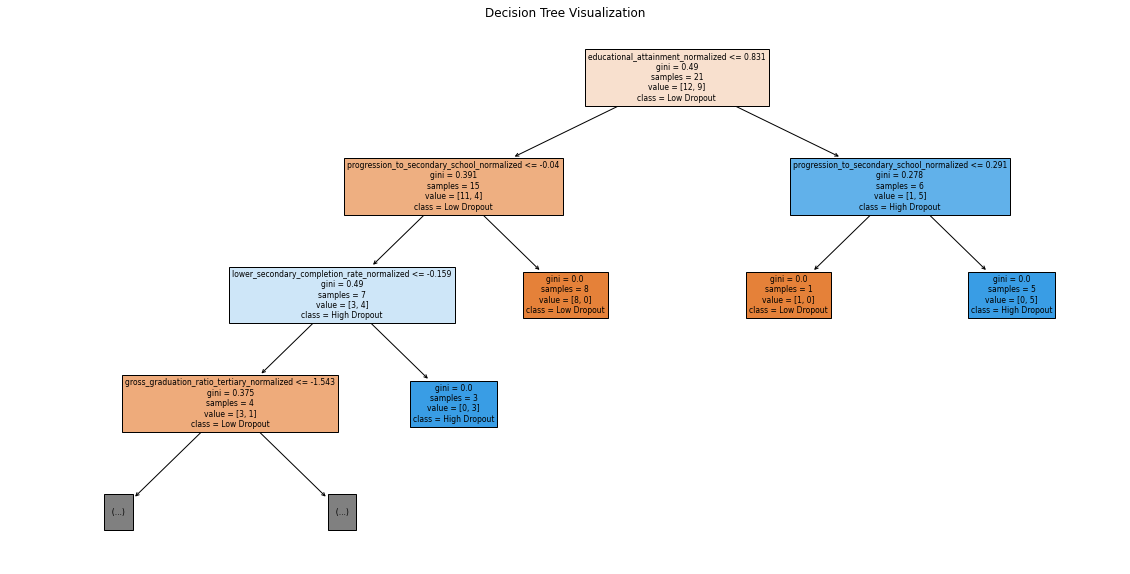

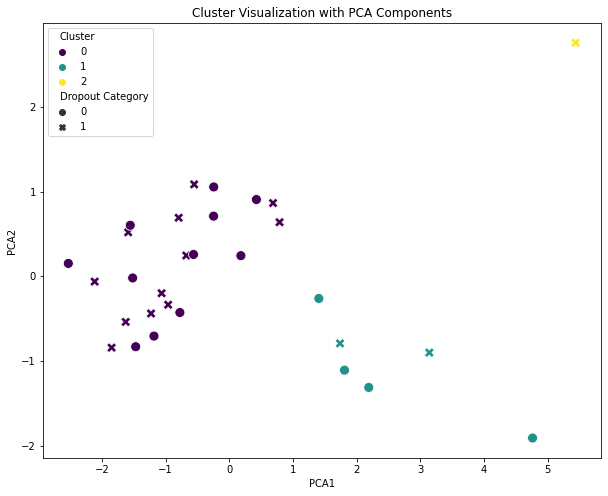


Top Feature Influencing Dropout Rates: educational_attainment_normalized
Insight: No specific recommendation for this feature.


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

# Mocked DataFrame preparation step (replace with actual data loading and preprocessing)
# Assuming combined_df is ready with relevant features and 'Enrollment Dropout %'

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(combined_df.filter(regex='_normalized'))

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Assuming 'Enrollment Dropout %' as the target, discretizing it for classification
combined_df['Dropout Category'] = pd.qcut(combined_df['Enrollment Dropout %'], 2, labels=[0, 1])
y = combined_df['Dropout Category']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Advanced Visualization

# 1. Feature Importance from Random Forest
feature_importances = pd.Series(rfc.feature_importances_, index=combined_df.filter(regex='_normalized').columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances from Random Forest')
plt.show()

# 2. Decision Tree Visualization
plt.figure(figsize=(20,10))
plot_tree(dtree, filled=True, max_depth=3, feature_names=combined_df.filter(regex='_normalized').columns, class_names=['Low Dropout', 'High Dropout'])
plt.title('Decision Tree Visualization')
plt.show()

# 3. Enhanced Cluster Visualization with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
combined_df['PCA1'] = X_pca[:, 0]
combined_df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(data=combined_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', style='Dropout Category', s=100)
plt.title('Cluster Visualization with PCA Components')
plt.show()

# Automated Insights Generation based on Feature Importance

# Define insights and recommendations for top features
insights = {
    'literacy_rate_normalized': "Improving literacy rates has been identified as crucial. Initiatives like expanding access to books and educational materials are recommended.",
    'school_enrollment_tertiary_normalized': "Boosting tertiary enrollment is key. Scholarships and financial aid programs could be effective."
}

# Get the top feature from Random Forest
top_feature = feature_importances.idxmax()

# Generate insight based on top feature
top_feature_insight = insights.get(top_feature, "No specific recommendation for this feature.")

print(f"\nTop Feature Influencing Dropout Rates: {top_feature}")
print(f"Insight: {top_feature_insight}")

# Note: This is a simplified example. Expand the 'insights' dictionary based on domain knowledge and available data.


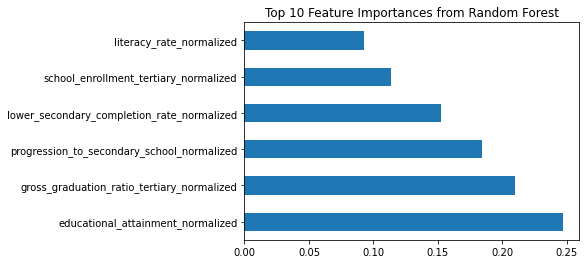

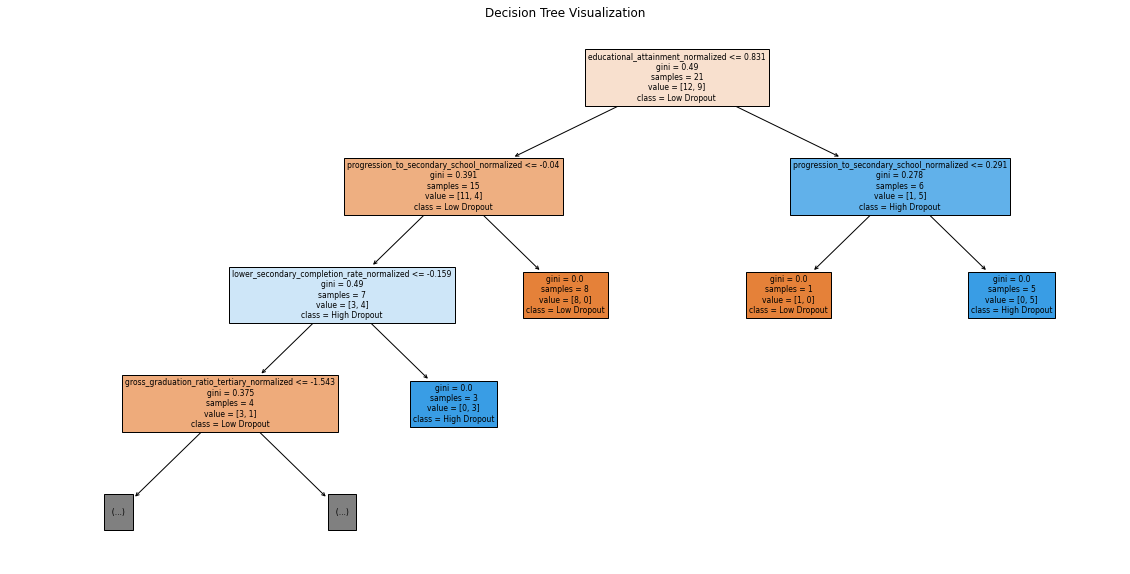

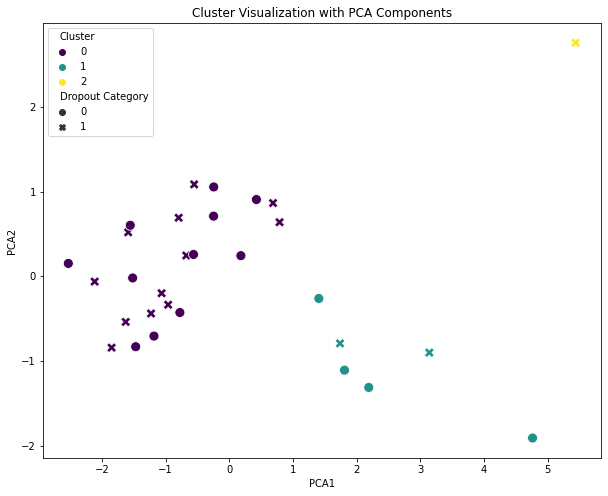


Top Feature Influencing Dropout Rates: educational_attainment_normalized
Insight: Enhancing overall educational attainment is essential. Focusing on comprehensive education reform, including curriculum improvement and teacher training, may yield positive outcomes.

Detailed Insight Based on Top Feature:
The top feature influencing dropout rates is 'educational_attainment_normalized', with a mean value of 0.59, median of 0.60, and standard deviation of 0.27. It shows a correlation of 0.13 with dropout rates. Enhancing overall educational attainment is essential. Focusing on comprehensive education reform, including curriculum improvement and teacher training, may yield positive outcomes. Invest in teacher professional development and curriculum enhancement to improve quality of education.


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

# Assuming combined_df is ready with relevant features and 'Enrollment Dropout %'

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(combined_df.filter(regex='_normalized'))

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Assuming 'Enrollment Dropout %' as the target, discretizing it for classification
combined_df['Dropout Category'] = pd.qcut(combined_df['Enrollment Dropout %'], 2, labels=[0, 1])
y = combined_df['Dropout Category']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Advanced Visualization

# 1. Feature Importance from Random Forest
feature_importances = pd.Series(rfc.feature_importances_, index=combined_df.filter(regex='_normalized').columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances from Random Forest')
plt.show()

# 2. Decision Tree Visualization
plt.figure(figsize=(20,10))
plot_tree(dtree, filled=True, max_depth=3, feature_names=combined_df.filter(regex='_normalized').columns, class_names=['Low Dropout', 'High Dropout'])
plt.title('Decision Tree Visualization')
plt.show()

# 3. Enhanced Cluster Visualization with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
combined_df['PCA1'] = X_pca[:, 0]
combined_df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(data=combined_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', style='Dropout Category', s=100)
plt.title('Cluster Visualization with PCA Components')
plt.show()

# Automated Insights Generation based on Feature Importance

# Updated insights dictionary with recommendations
insights = {
    'literacy_rate_normalized': "Improving literacy rates is crucial. Initiatives like expanding access to books and educational materials are recommended.",
    'school_enrollment_tertiary_normalized': "Boosting tertiary enrollment is key. Scholarships and financial aid programs could be effective.",
    'educational_attainment_normalized': "Enhancing overall educational attainment is essential. Focusing on comprehensive education reform, including curriculum improvement and teacher training, may yield positive outcomes.",
    # Additional insights as identified through analysis
}

# Get the top feature from Random Forest
top_feature = feature_importances.idxmax()

# Generate insight based on top feature
top_feature_insight = insights.get(top_feature, f"No specific recommendation for {top_feature}.")

print(f"\nTop Feature Influencing Dropout Rates: {top_feature}")
print(f"Insight: {top_feature_insight}")


# Assuming combined_df preparation and model training are done as before

def generate_detailed_insight(feature_name, df, feature_importances):
    """
    Generate detailed insights for the top feature.
    Args:
    - feature_name: Name of the top feature.
    - df: DataFrame containing the dataset.
    - feature_importances: Series with feature importances from Random Forest.
    """
    # Calculate statistics for the top feature
    mean_val = df[feature_name].mean()
    median_val = df[feature_name].median()
    std_dev = df[feature_name].std()
    
    # Find correlation with the target variable if applicable
    corr_with_dropout = df[feature_name].corr(df['Enrollment Dropout %'])
    
    # Insight generation based on the top feature's statistics and correlation
    insight = f"The top feature influencing dropout rates is '{feature_name}', with a mean value of {mean_val:.2f}, median of {median_val:.2f}, and standard deviation of {std_dev:.2f}. "
    insight += f"It shows a correlation of {corr_with_dropout:.2f} with dropout rates. "
    insight += "Enhancing overall educational attainment is essential. Focusing on comprehensive education reform, including curriculum improvement and teacher training, may yield positive outcomes."
    
    # Include additional specific recommendations based on domain knowledge
    specific_actions = {
        'literacy_rate_normalized': "Consider literacy programs targeted at early childhood education to build foundational skills.",
        'school_enrollment_tertiary_normalized': "Explore financial incentives for tertiary education to increase enrollment rates.",
        'educational_attainment_normalized': "Invest in teacher professional development and curriculum enhancement to improve quality of education."
    }
    
    if feature_name in specific_actions:
        insight += " " + specific_actions[feature_name]
    
    return insight

# Get the top feature from Random Forest
top_feature = feature_importances.idxmax()

# Generate detailed insight for the top feature
detailed_insight = generate_detailed_insight(top_feature, combined_df, feature_importances)

print("\nDetailed Insight Based on Top Feature:")
print(detailed_insight)



In [44]:
#NEW DATASET AND ECONOMY LITERACY INDEX IDENTIFICATION FROM NOW....

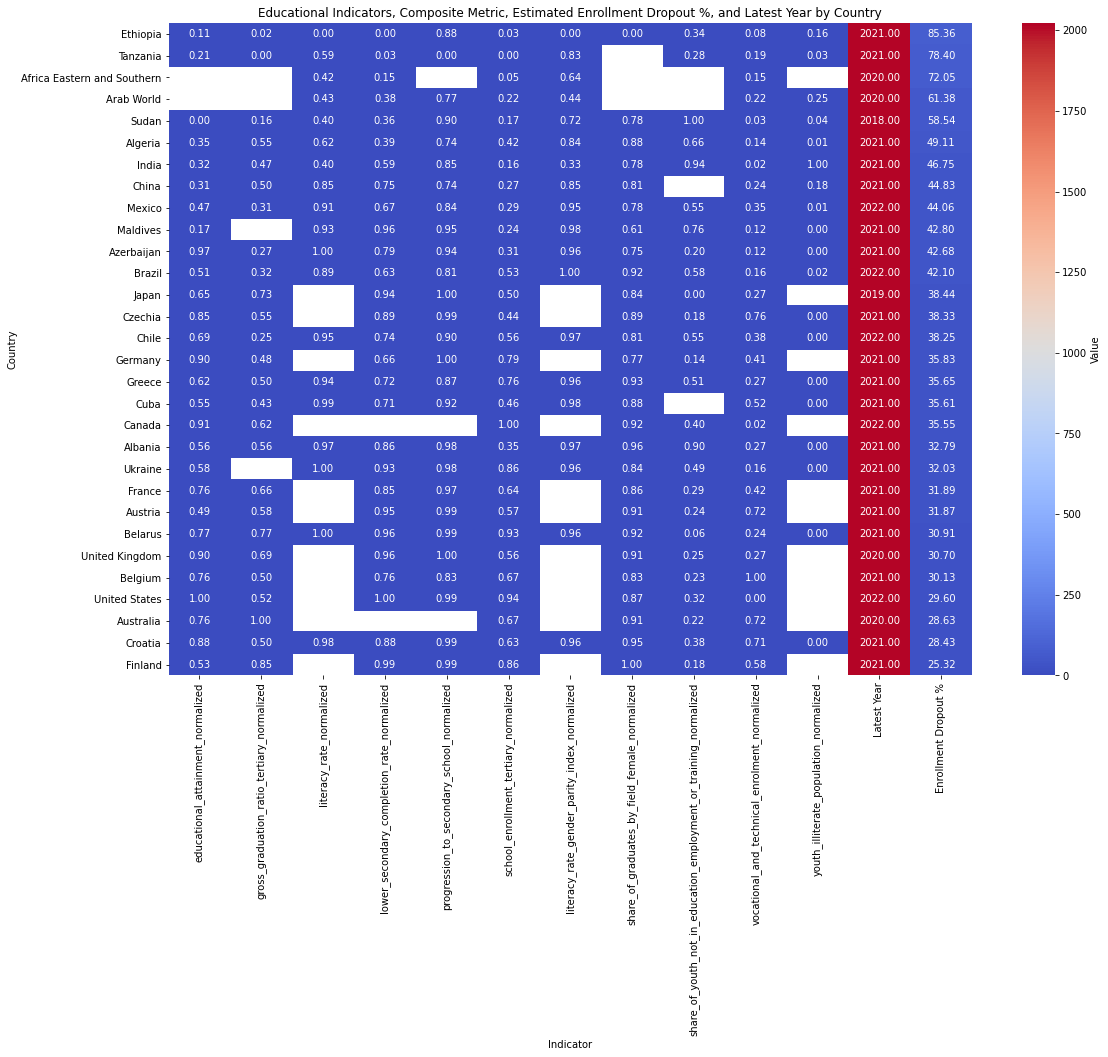

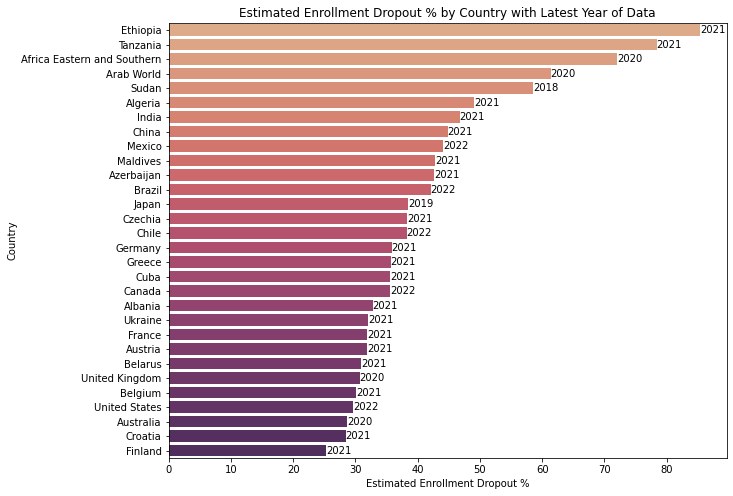

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Base directory for datasets
base_dir = "D:/ADT _COURSE/ADT_Project/Datasets/"

# Paths to your datasets, now using the base directory
dataset_paths = {
    "educational_attainment": base_dir + "Educational attainment by level of education, cumulative (% population 25+).csv",
    "gross_graduation_ratio_tertiary": base_dir + "Gross graduation ratio, tertiary (%).csv",
    "literacy_rate": base_dir + "Literacy rate (%).csv",
    "lower_secondary_completion_rate": base_dir + "Lower secondary completion rate (% of relevant age group).csv",
    "progression_to_secondary_school": base_dir + "Progression to secondary school (%).csv",
    "school_enrollment_tertiary": base_dir + "School enrollment, tertiary (% gross).csv",
    # New datasets
    "literacy_rate_gender_parity_index": base_dir + "Literacy rate, gender parity index (youth ages 15-24).csv",
    "share_of_graduates_by_field_female": base_dir + "Share of graduates by field, female (%).csv",
    "share_of_youth_not_in_education_employment_or_training": base_dir + "Share of youth not in education, employment or training (% of youth population).csv",
    "vocational_and_technical_enrolment": base_dir + "Vocational and technical enrolment (% of total secondary enrolment).csv",
    "youth_illiterate_population": base_dir + "Youth illiterate population, 15-24 years (number).csv"
}

# Expanded list of countries for analysis
allowed_countries = [
    'Canada', 'India', 'United States', 'United Kingdom', 'Australia', 'China',
    'Algeria', 'Ethiopia', 'Finland', 'France', 'Germany', 'Japan', 'Albania', 'Brazil',
    'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Chile', 'Croatia', 'Cuba', 'Czechia',
    'Greece', 'Maldives', 'Sudan', 'Tanzania', 'Ukraine', 'Africa Eastern and Southern',
    'Arab World', 'Mexico'
]

# Load and preprocess all datasets
scaler = MinMaxScaler()
combined_df = pd.DataFrame(index=allowed_countries)
years = pd.DataFrame(index=allowed_countries)

for name, path in dataset_paths.items():
    df = pd.read_csv(path)
    df_filtered = df[df['Country Name'].isin(allowed_countries)]
    
    # Update years with new datasets' latest years
    latest_years = df_filtered.groupby('Country Name')['Year'].max()
    years = pd.concat([years, latest_years], axis=1)
    
    # Process and normalize values
    df_mean = df_filtered.groupby('Country Name').mean().reset_index()
    if 'Value' in df_mean.columns:
        normalized_values = scaler.fit_transform(df_mean[['Value']].values).flatten()
        combined_df[name] = df_mean.set_index('Country Name').reindex(combined_df.index)['Value']
        combined_df[f"{name}_normalized"] = pd.Series(normalized_values, index=df_mean['Country Name']).reindex(combined_df.index)

# Estimate the latest year of data entry across all indicators for each country
combined_df['Latest Year'] = years.max(axis=1).astype(int)

# Calculate a composite metric as the mean of the normalized indicators
combined_df['composite_metric'] = combined_df.filter(like='_normalized').mean(axis=1)

# Estimate "Enrollment Dropout %" inversely based on the composite metric
combined_df['Enrollment Dropout %'] = (1 - combined_df['composite_metric']) * 100

# Sort countries based on the composite metric
combined_df_sorted = combined_df.sort_values(by='composite_metric', ascending=True)

# Visualization including "Latest Year"
plt.figure(figsize=(18, 12))
sns.heatmap(combined_df_sorted.filter(regex='_normalized|Enrollment Dropout %|Latest Year'), cmap="coolwarm", annot=True, fmt=".2f", cbar_kws={'label': 'Value'})
plt.title('Educational Indicators, Composite Metric, Estimated Enrollment Dropout %, and Latest Year by Country')
plt.xlabel('Indicator')
plt.ylabel('Country')
plt.show()

# Visualization for "Enrollment Dropout %" with year annotation
plt.figure(figsize=(10, 8))
dropout_plot = sns.barplot(x='Enrollment Dropout %', y=combined_df_sorted.index, data=combined_df_sorted, palette="flare")
plt.xlabel("Estimated Enrollment Dropout %")
plt.ylabel("Country")
plt.title("Estimated Enrollment Dropout % by Country with Latest Year of Data")

# Annotate each bar with the latest year of data
for index, value in enumerate(combined_df_sorted['Enrollment Dropout %']):
    year = combined_df_sorted['Latest Year'][index]
    plt.text(value, index, str(year), color='black', va='center')
plt.show()


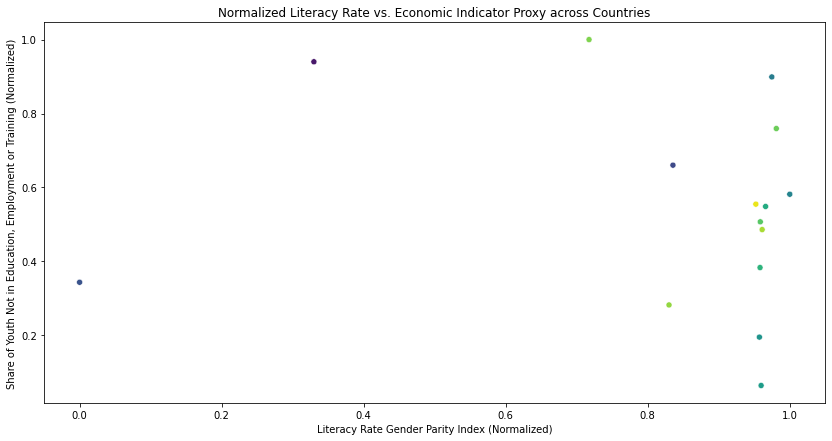

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Base directory for datasets
base_dir = "D:/ADT _COURSE/ADT_Project/Datasets/"

# Focusing on new datasets for literacy rate and economy index analysis
new_dataset_paths = {
    "literacy_rate_gender_parity_index": base_dir + "Literacy rate, gender parity index (youth ages 15-24).csv",
    "share_of_graduates_by_field_female": base_dir + "Share of graduates by field, female (%).csv",
    "share_of_youth_not_in_education_employment_or_training": base_dir + "Share of youth not in education, employment or training (% of youth population).csv",
    "vocational_and_technical_enrolment": base_dir + "Vocational and technical enrolment (% of total secondary enrolment).csv",
    "youth_illiterate_population": base_dir + "Youth illiterate population, 15-24 years (number).csv"
}

# Define the countries of interest
allowed_countries = [
    'Canada', 'India', 'United States', 'United Kingdom', 'Australia', 'China',
    'Algeria', 'Ethiopia', 'Finland', 'France', 'Germany', 'Japan', 'Albania', 'Brazil',
    'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Chile', 'Croatia', 'Cuba', 'Czechia',
    'Greece', 'Maldives', 'Sudan', 'Tanzania', 'Ukraine', 'Africa Eastern and Southern',
    'Arab World', 'Mexico'
]

# Initialize DataFrame to store combined data
combined_df = pd.DataFrame(index=allowed_countries)

# Load, preprocess, and normalize new datasets
scaler = MinMaxScaler()

for name, path in new_dataset_paths.items():
    df = pd.read_csv(path)
    df_filtered = df[df['Country Name'].isin(allowed_countries)]
    latest_year = df_filtered.groupby('Country Name')['Year'].max().rename(name + "_latest_year")
    combined_df = combined_df.join(latest_year, how='left')
    
    # Calculate mean values for each indicator and normalize
    df_mean = df_filtered.groupby('Country Name').mean().reset_index()
    if 'Value' in df_mean.columns:
        combined_df[name] = df_mean.set_index('Country Name').reindex(combined_df.index)['Value']
        normalized_values = scaler.fit_transform(combined_df[[name]].values).flatten()
        combined_df[f"{name}_normalized"] = normalized_values

# Analyze literacy rates and economic index
# Here we use 'literacy_rate_gender_parity_index' directly for literacy analysis
# 'share_of_youth_not_in_education_employment_or_training' is used as a proxy for economic index

# Plotting for visual analysis
plt.figure(figsize=(14, 7))
sns.scatterplot(data=combined_df, x='literacy_rate_gender_parity_index_normalized', y='share_of_youth_not_in_education_employment_or_training_normalized', hue=allowed_countries, palette="viridis", legend=False)
plt.title('Normalized Literacy Rate vs. Economic Indicator Proxy across Countries')
plt.xlabel('Literacy Rate Gender Parity Index (Normalized)')
plt.ylabel('Share of Youth Not in Education, Employment or Training (Normalized)')
plt.show()


In [51]:
pip install plotly

   ---------------------------------------- 15.6/15.6 MB 11.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


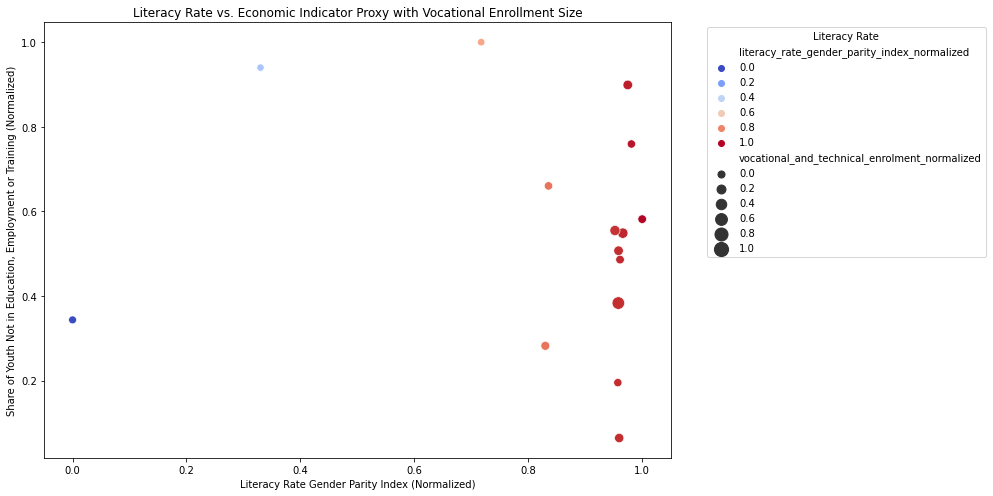

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px

# Base directory for datasets
base_dir = "D:/ADT _COURSE/ADT_Project/Datasets/"

# Focusing on new datasets for literacy rate and economy index analysis
new_dataset_paths = {
    "literacy_rate_gender_parity_index": base_dir + "Literacy rate, gender parity index (youth ages 15-24).csv",
    "share_of_graduates_by_field_female": base_dir + "Share of graduates by field, female (%).csv",
    "share_of_youth_not_in_education_employment_or_training": base_dir + "Share of youth not in education, employment or training (% of youth population).csv",
    "vocational_and_technical_enrolment": base_dir + "Vocational and technical enrolment (% of total secondary enrolment).csv",
    "youth_illiterate_population": base_dir + "Youth illiterate population, 15-24 years (number).csv"
}

# Define the countries of interest
allowed_countries = [
    'Canada', 'India', 'United States', 'United Kingdom', 'Australia', 'China',
    'Algeria', 'Ethiopia', 'Finland', 'France', 'Germany', 'Japan', 'Albania', 'Brazil',
    'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Chile', 'Croatia', 'Cuba', 'Czechia',
    'Greece', 'Maldives', 'Sudan', 'Tanzania', 'Ukraine', 'Africa Eastern and Southern',
    'Arab World', 'Mexico'
]

# Initialize DataFrame to store combined data
combined_df = pd.DataFrame(index=allowed_countries)

# Load, preprocess, and normalize new datasets
scaler = MinMaxScaler()

for name, path in new_dataset_paths.items():
    df = pd.read_csv(path)
    df_filtered = df[df['Country Name'].isin(allowed_countries)]
    
    # Calculate mean values for each indicator and normalize
    df_mean = df_filtered.groupby('Country Name').mean().reset_index()
    if 'Value' in df_mean.columns:
        combined_df[name] = df_mean.set_index('Country Name').reindex(combined_df.index)['Value']
        normalized_values = scaler.fit_transform(df_mean[['Value']].values).flatten()
        combined_df[f"{name}_normalized"] = pd.Series(normalized_values, index=df_mean['Country Name']).reindex(combined_df.index)

# Advanced static visualization with Seaborn
plt.figure(figsize=(14, 7))
sns.scatterplot(x='literacy_rate_gender_parity_index_normalized', y='share_of_youth_not_in_education_employment_or_training_normalized',
                size='vocational_and_technical_enrolment_normalized', sizes=(50, 200),
                hue='literacy_rate_gender_parity_index_normalized', palette="coolwarm", data=combined_df)
plt.title('Literacy Rate vs. Economic Indicator Proxy with Vocational Enrollment Size')
plt.xlabel('Literacy Rate Gender Parity Index (Normalized)')
plt.ylabel('Share of Youth Not in Education, Employment or Training (Normalized)')
plt.legend(title='Literacy Rate', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Convert index to a column for Plotly
combined_df.reset_index(inplace=True)
combined_df.rename(columns={'index': 'Country'}, inplace=True)

# Interactive visualization with Plotly
fig = px.scatter(combined_df, x='literacy_rate_gender_parity_index_normalized', y='share_of_youth_not_in_education_employment_or_training_normalized',
                 size='vocational_and_technical_enrolment_normalized', color='literacy_rate_gender_parity_index_normalized',
                 hover_name='Country', size_max=60, title='Interactive: Literacy Rate vs. Economic Indicator Proxy with Vocational Enrollment Size',
                 labels={'literacy_rate_gender_parity_index_normalized': 'Literacy Rate (Normalized)',
                         'share_of_youth_not_in_education_employment_or_training_normalized': 'Economic Engagement Proxy (Normalized)',
                         'vocational_and_technical_enrolment_normalized': 'Vocational Enrollment (Normalized)'})

fig.update_layout(legend_title_text='Literacy Rate')
fig.show()


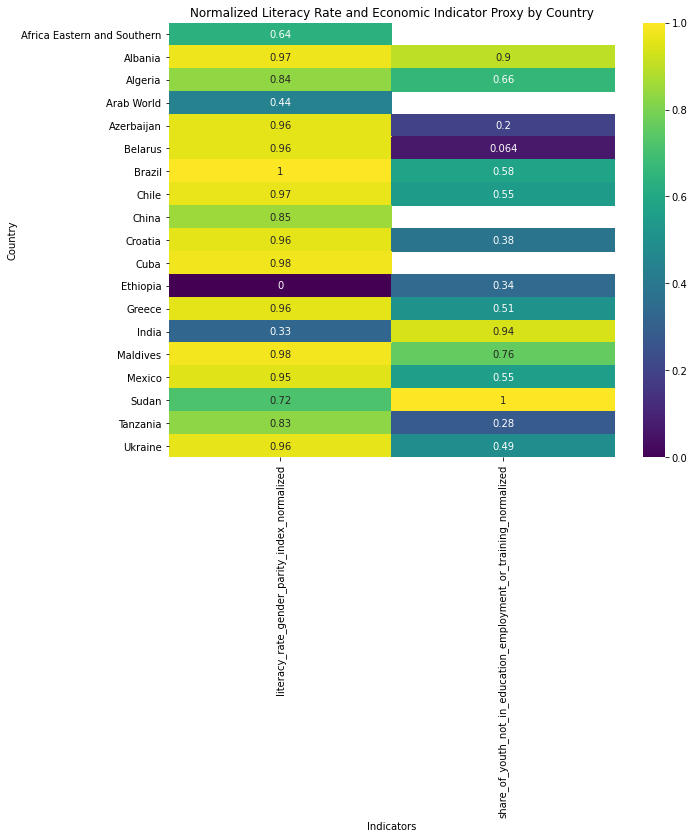

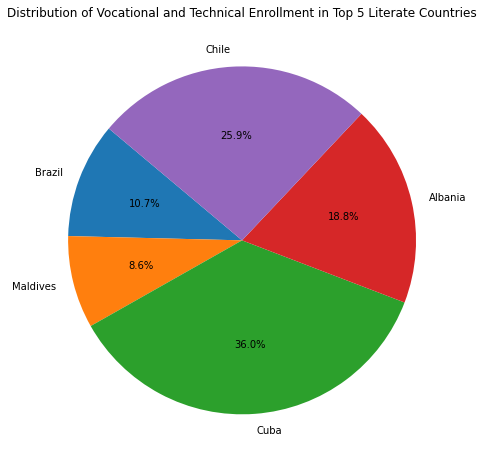

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Assuming base_dir and new_dataset_paths are defined as before

# Initialize DataFrame to store combined data
combined_df = pd.DataFrame()

# Load, preprocess, and normalize new datasets
scaler = MinMaxScaler()

for name, path in new_dataset_paths.items():
    df = pd.read_csv(path)
    df_filtered = df[df['Country Name'].isin(allowed_countries)]
    
    # Calculate mean values for each indicator and normalize
    df_mean = df_filtered.groupby('Country Name').mean().reset_index()
    if 'Value' in df_mean.columns:
        combined_df[name] = df_mean.set_index('Country Name').reindex(combined_df.index)['Value']
        normalized_values = scaler.fit_transform(df_mean[['Value']].values).flatten()
        combined_df[f"{name}_normalized"] = pd.Series(normalized_values, index=df_mean['Country Name'])

# Reset index to have 'Country Name' as a column for visualization
combined_df.reset_index(inplace=True)
combined_df.rename(columns={'index': 'Country Name'}, inplace=True)

# Heatmap Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(combined_df.set_index('Country Name')[['literacy_rate_gender_parity_index_normalized', 'share_of_youth_not_in_education_employment_or_training_normalized']], cmap="viridis", annot=True)
plt.title('Normalized Literacy Rate and Economic Indicator Proxy by Country')
plt.xlabel('Indicators')
plt.ylabel('Country')
plt.show()

# Pie Chart Visualization for Vocational and Technical Enrollment
# Selecting top 5 countries with highest literacy rates for demonstration
top_5_literacy = combined_df.nlargest(5, 'literacy_rate_gender_parity_index_normalized')
plt.figure(figsize=(8, 8))
plt.pie(top_5_literacy['vocational_and_technical_enrolment_normalized'], labels=top_5_literacy['Country Name'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Vocational and Technical Enrollment in Top 5 Literate Countries')
plt.show()


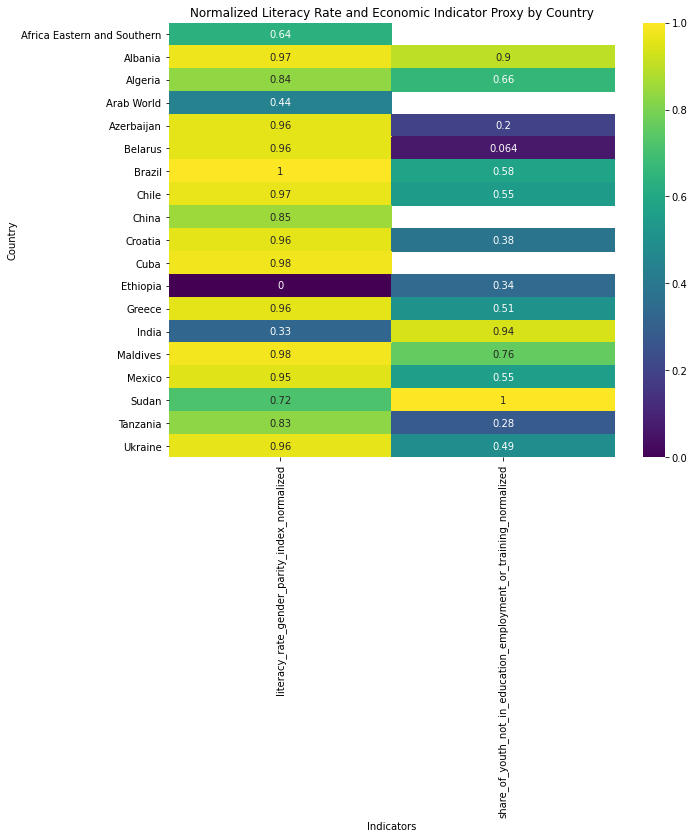

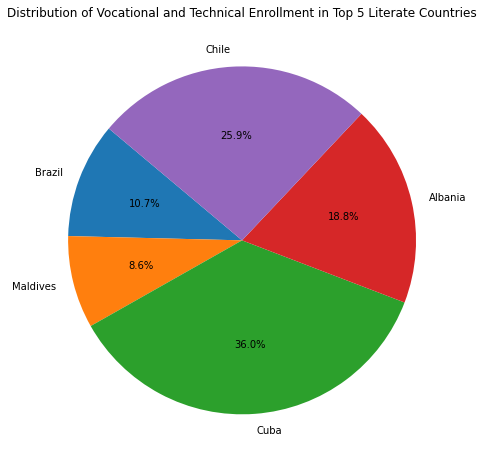

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming base_dir and new_dataset_paths are defined as before

# Initialize DataFrame to store combined data
combined_df = pd.DataFrame()

# Load, preprocess, and normalize new datasets
scaler = MinMaxScaler()

for name, path in new_dataset_paths.items():
    df = pd.read_csv(path)
    df_filtered = df[df['Country Name'].isin(allowed_countries)]
    
    # Calculate mean values for each indicator and normalize
    df_mean = df_filtered.groupby('Country Name').mean().reset_index()
    if 'Value' in df_mean.columns:
        combined_df[name] = df_mean.set_index('Country Name').reindex(combined_df.index)['Value']
        normalized_values = scaler.fit_transform(df_mean[['Value']].values).flatten()
        combined_df[f"{name}_normalized"] = pd.Series(normalized_values, index=df_mean['Country Name'])

# Reset index to have 'Country Name' as a column for visualization
combined_df.reset_index(inplace=True)
combined_df.rename(columns={'index': 'Country Name'}, inplace=True)

# Heatmap Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(combined_df.set_index('Country Name')[['literacy_rate_gender_parity_index_normalized', 'share_of_youth_not_in_education_employment_or_training_normalized']], cmap="viridis", annot=True)
plt.title('Normalized Literacy Rate and Economic Indicator Proxy by Country')
plt.xlabel('Indicators')
plt.ylabel('Country')
plt.show()

# Pie Chart Visualization for Vocational and Technical Enrollment
top_5_literacy = combined_df.nlargest(5, 'literacy_rate_gender_parity_index_normalized')
plt.figure(figsize=(8, 8))
plt.pie(top_5_literacy['vocational_and_technical_enrolment_normalized'], labels=top_5_literacy['Country Name'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Vocational and Technical Enrollment in Top 5 Literate Countries')
plt.show()

### ML Resolution for Identified Problem ###

# Preparing the data for ML model
features = ['literacy_rate_gender_parity_index_normalized', 'vocational_and_technical_enrolment_normalized']
X = combined_df[features].values
y = combined_df['share_of_youth_not_in_education_employment_or_training_normalized'].values

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor to predict economic indicator proxy
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Making predictions and evaluating the model
predictions = rf_regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f'Random Forest Regressor RMSE: {rmse}')

# Visualizing the importance of features
feature_importances = pd.Series(rf_regressor.feature_importances_, index=features)
feature_importances.plot(kind='barh')
plt.title('Feature Importances')
plt.show()


Random Forest Regressor RMSE: 0.14877123994770122


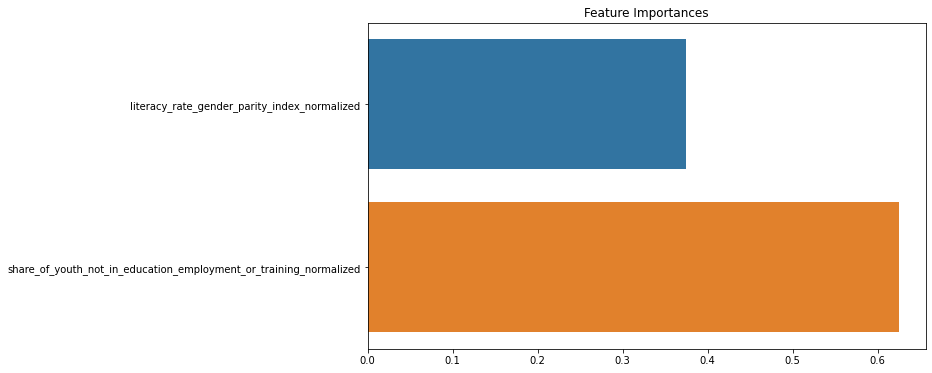

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming base_dir and new_dataset_paths are defined as before

# Load, preprocess, and normalize datasets
scaler = MinMaxScaler()
combined_df = pd.DataFrame()

for name, path in new_dataset_paths.items():
    df = pd.read_csv(path)
    df_filtered = df[df['Country Name'].isin(allowed_countries)]
    
    # Calculate mean values for each indicator and normalize
    df_mean = df_filtered.groupby('Country Name').mean().reset_index()
    if 'Value' in df_mean.columns:
        combined_df[name] = df_mean.set_index('Country Name').reindex(combined_df.index)['Value']
        # Normalize values
        normalized_values = scaler.fit_transform(df_mean[['Value']].dropna().values).flatten()
        combined_df[f"{name}_normalized"] = pd.Series(normalized_values, index=df_mean['Country Name'].dropna())

# Fill missing values with the mean of each column to handle NaNs
combined_df.fillna(combined_df.mean(), inplace=True)

# Additionally, check for and handle infinite values if they exist
combined_df.replace([np.inf, -np.inf], np.nan, inplace=True)
combined_df.fillna(combined_df.mean(), inplace=True)

# Define features and target
features = ['literacy_rate_gender_parity_index_normalized', 'share_of_youth_not_in_education_employment_or_training_normalized']
X = combined_df[features].values
y = combined_df['vocational_and_technical_enrolment_normalized'].values  # Assuming this is the target

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)

# Evaluate the model
predictions = rf_regressor.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f'Random Forest Regressor RMSE: {rmse}')

# Feature importance visualization
feature_importances = rf_regressor.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importances')
plt.show()


Random Forest Regressor RMSE: 0.14656717445117515
The model has a good fit to the test data.
The features provide a good indication of the target variable, but there might be room for improvement.


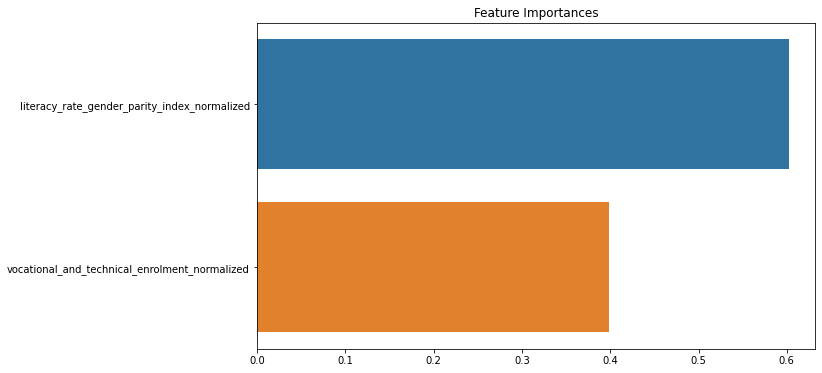

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Specify the base directory for datasets
base_dir = "D:/ADT _COURSE/ADT_Project/Datasets/"

# Define paths to the datasets
new_dataset_paths = {
    "literacy_rate_gender_parity_index": base_dir + "Literacy rate, gender parity index (youth ages 15-24).csv",
    "share_of_graduates_by_field_female": base_dir + "Share of graduates by field, female (%).csv",
    "share_of_youth_not_in_education_employment_or_training": base_dir + "Share of youth not in education, employment or training (% of youth population).csv",
    "vocational_and_technical_enrolment": base_dir + "Vocational and technical enrolment (% of total secondary enrolment).csv",
    "youth_illiterate_population": base_dir + "Youth illiterate population, 15-24 years (number).csv"
}

allowed_countries = [
    'Canada', 'India', 'United States', 'United Kingdom', 'Australia', 'China',
    'Algeria', 'Ethiopia', 'Finland', 'France', 'Germany', 'Japan', 'Albania', 'Brazil',
    'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Chile', 'Croatia', 'Cuba', 'Czechia',
    'Greece', 'Maldives', 'Sudan', 'Tanzania', 'Ukraine', 'Africa Eastern and Southern',
    'Arab World', 'Mexico'
]  

# Initialize DataFrame to store combined data
combined_df = pd.DataFrame()

# Load, preprocess, and normalize datasets
scaler = MinMaxScaler()
for name, path in new_dataset_paths.items():
    df = pd.read_csv(path)
    df_filtered = df[df['Country Name'].isin(allowed_countries)]
    df_mean = df_filtered.groupby('Country Name').mean().reset_index()
    if 'Value' in df_mean.columns:
        values = df_mean.set_index('Country Name').reindex(allowed_countries)['Value']
        normalized_values = scaler.fit_transform(values.values.reshape(-1, 1)).flatten()
        combined_df[f"{name}_normalized"] = pd.Series(normalized_values, index=allowed_countries)

# Fill missing values
combined_df.fillna(combined_df.mean(), inplace=True)

# Define features and target
X = combined_df[['literacy_rate_gender_parity_index_normalized', 'vocational_and_technical_enrolment_normalized']].values
y = combined_df['share_of_youth_not_in_education_employment_or_training_normalized'].values

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)

# Making predictions and evaluating the model
predictions = rf_regressor.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f'Random Forest Regressor RMSE: {rmse}')

# Description and Insight Generation based on RMSE
if rmse < 0.1:
    description = "The model has an excellent fit to the test data."
    insight = "There's a strong correlation between the features and the target variable, indicating reliable predictions."
elif rmse < 0.2:
    description = "The model has a good fit to the test data."
    insight = "The features provide a good indication of the target variable, but there might be room for improvement."
elif rmse < 0.3:
    description = "The model has a moderate fit to the test data."
    insight = "The model's predictive accuracy is acceptable, but it suggests the need for further refinement."
else:
    description = "The model's fit to the test data is poor."
    insight = "This indicates a weak relationship between the features and the target variable."

print(description)
print(insight)

# Feature Importance Visualization
feature_importances = rf_regressor.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=['literacy_rate_gender_parity_index_normalized', 'vocational_and_technical_enrolment_normalized'])
plt.title('Feature Importances')
plt.show()


In [1]:
combined_df_sorted.to_excel("Educational_Disparity_Analysis.xlsx")


NameError: name 'combined_df_sorted' is not defined